### Importing Necessary Packages for Exploratory Data Analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 700)
pd.set_option('display.width', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Importing Datasets

In [2]:
df1 = pd.read_csv('Movies_file_1-Copy1.csv')
df2 = pd.read_csv('Movies_file_2-Copy1.csv')

In [3]:
df1 = df1.drop('Unnamed: 0',axis = 1)
df2 = df2.drop('Unnamed: 0',axis = 1)

In [4]:
df = df1.merge(df2,on='Movie_Name')
df.head()

Movie_Name           Director1    Director2  \
0                Spider-Man: Across the Spider-Verse  Joaquim Dos Santos  Kemp Powers   
1                                    The Dark Knight   Christopher Nolan          NaN   
2      The Lord of the Rings: The Return of the King       Peter Jackson          NaN   
3                                          Inception   Christopher Nolan          NaN   
4  The Lord of the Rings: The Fellowship of the Ring       Peter Jackson          NaN   

            Director3 Duration  year  Ratings  Metascore  Sno              Star1  \
0  Justin K. Thompson  140 min  2023      9.1       86.0    1      Shameik Moore   
1                 NaN  152 min  2008      9.0       84.0    2     Christian Bale   
2                 NaN  201 min  2003      9.0       94.0    3        Elijah Wood   
3                 NaN  148 min  2010      8.8       74.0    4  Leonardo DiCaprio   
4                 NaN  178 min  2001      8.8       92.0    5        Elijah Wood   

                  Star2          Star3          Star4      Votes     Genre1     Genre2     Genre3  \
0      Hailee Steinfeld    Oscar Isaac   Jake Johnson     29,474  Animation  Adventure  Adventure   
1          Heath Ledger  Aaron Eckhart  Michael Caine  2,719,284     Action      Drama      Drama   
2       Viggo Mortensen   Ian McKellen  Orlando Bloom  1,887,739     Action      Drama      Drama   
3  Joseph Gordon-Levitt    Elliot Page   Ken Watanabe  2,413,938     Action     Sci-Fi     Sci-Fi   
4          Ian McKellen  Orlando Bloom      Sean Bean  1,916,363     Action      Drama      Drama   

   Gross_Collection Popularity Certification  
0      6.910000e+07         23            PG  
1      1.006234e+09        117         PG-13  
2      1.147634e+09        407         PG-13  
3      8.701105e+08        103         PG-13  
4      8.982044e+08        184         PG-13

In [5]:
df.shape

(1837, 20)

- The Dataset contains 1837 rows and 20 features

#### Duplicate and Abnormal Values

In [6]:
df.duplicated().sum()

0

In [7]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

- There are no duplicate and Abnormal Values is the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1836
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie_Name        1837 non-null   object 
 1   Director1         1837 non-null   object 
 2   Director2         113 non-null    object 
 3   Director3         13 non-null     object 
 4   Duration          1837 non-null   object 
 5   year              1837 non-null   int64  
 6   Ratings           1837 non-null   float64
 7   Metascore         1646 non-null   float64
 8   Sno               1837 non-null   int64  
 9   Star1             1837 non-null   object 
 10  Star2             1836 non-null   object 
 11  Star3             1836 non-null   object 
 12  Star4             1835 non-null   object 
 13  Votes             1837 non-null   object 
 14  Genre1            1837 non-null   object 
 15  Genre2            1690 non-null   object 
 16  Genre3            1690 non-null   object 


#### Observations

- The features `Duration`,`Popularity` are Numerical columns in Actual so we need to convert them into Integer
- There are 12 Categorical Features and rest are Numerical Features
- The Feature `Sno` is not needed.

In [9]:
df.drop('Sno',axis=1,inplace=True)

In [10]:
df.columns

Index(['Movie_Name', 'Director1', 'Director2', 'Director3', 'Duration', 'year', 'Ratings',
       'Metascore', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2', 'Genre3',
       'Gross_Collection', 'Popularity', 'Certification'],
      dtype='object')

#### Checking for Missing Values

In [11]:
# Calculate the number of null values in each column
null_count = df.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (null_count / len(df)) * 100

# Create a DataFrame to store the null values and their percentages
null_report = pd.DataFrame({'Null Count': null_count, 'Null Percentage': round(null_percentage,2)})
null_report.sort_values(ascending=False,by='Null Percentage')

Null Count  Null Percentage
Director3               1824            99.29
Director2               1724            93.85
Popularity               584            31.79
Metascore                191            10.40
Genre3                   147             8.00
Genre2                   147             8.00
Gross_Collection         108             5.88
Certification             10             0.54
Star4                      2             0.11
Star3                      1             0.05
Star2                      1             0.05
Director1                  0             0.00
Votes                      0             0.00
Genre1                     0             0.00
Star1                      0             0.00
Ratings                    0             0.00
year                       0             0.00
Duration                   0             0.00
Movie_Name                 0             0.00

#### Observation

- The features `Director2`,`Director3`,`Metascore`,`Genre2`,`Genre3`,`Gross_Collection`,`Popularity`,`Certification`,`Star2`,`Star3`,`Star4`

In [12]:
#Check the Value Counts for each feature to confirm no abnormality
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('########################################')

Movie_Name
G.I                              9
Mr                               9
Taxi                             4
Heist                            4
Robin Hood                       4
                                ..
Atlantis: The Lost Empire        1
Robin Hood: Prince of Thieves    1
National Treasure                1
Romancing the Stone              1
Sadak 2                          1
Name: Movie_Name, Length: 1710, dtype: int64
########################################
Director1
Michael Bay           15
Roland Emmerich       13
Tony Scott            13
Paul W.S. Anderson    13
Zack Snyder           13
                      ..
Donovan Marsh          1
Jeymes Samuel          1
Mike Newell            1
Ethan Maniquis         1
Mahesh Bhatt           1
Name: Director1, Length: 929, dtype: int64
########################################
Director2
Lilly Wachowski          5
Joe Russo                5
Espen Sandberg           4
Brian Taylor             4
Christopher Miller       3
    

In [13]:
## Converting Votes to Integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

- Converting `Popularity` feature to int

In [14]:
df['Popularity'] = df['Popularity'].fillna(0)
df['Popularity'] = df['Popularity'].str.replace(',', '').astype(float)
df['Popularity'] = df['Popularity'].replace(0, np.nan)

`Certification` Mappping

In [15]:
certification_mapping = {
    '18+': '18',
    '18 +': '18',
    '18TC': '18',
    '17+': '17',
    'NC-17': '17',
    '16+': '16',
    '16 +': '16',
    'PG 15': '15',
    'PG-15': '15',
    '13+': '13',
    '13 +': '13',
    'M': '13',
    'M/PG': '13',
    '12+': '12',
    'R-12': '12',
    '(Banned)': 'R',
    '8+': '8',
    '7+': '7'
}

df['Certification'] = df['Certification'].replace(certification_mapping)

In [16]:
df['Duration'] = df['Duration'].str.replace(' min','').astype(int)

### Handling Missing Values

In [17]:
df['Certification'] = df.Certification.replace(np.nan,'Not Rated')
df.Popularity.fillna(0.0,inplace=True)
df.Director2.fillna('NA',inplace=True)
df.Director3.fillna('NA',inplace=True)
df.Star2.fillna('NA',inplace=True)
df.Star3.fillna('NA',inplace=True)
df.Star4.fillna('NA',inplace=True)
df.Genre2.fillna('NA',inplace=True)
df.Genre3.fillna('NA',inplace=True)

In [18]:
df.isnull().sum()

Movie_Name            0
Director1             0
Director2             0
Director3             0
Duration              0
year                  0
Ratings               0
Metascore           191
Star1                 0
Star2                 0
Star3                 0
Star4                 0
Votes                 0
Genre1                0
Genre2                0
Genre3                0
Gross_Collection    108
Popularity            0
Certification         0
dtype: int64

#### - For `Metascore` and `Gross_Collection` we will use KNN Imputer

In [19]:
# Using knn imputer for both metascore and gross
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,PolynomialFeatures
from sklearn.impute  import KNNImputer
imputer=KNNImputer(n_neighbors=5)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Use some features of the data
data=df[['Ratings','Votes','Metascore']]

# Perform Min-Max Scaling
scaled_data = scaler.fit_transform(data)

# Fit the imputer on the data
imputer.fit(scaled_data)

# Replacing the missing values
data=imputer.transform(scaled_data)


# Reverse the scaling
unscaled_data = scaler.inverse_transform(data)
df['Metascore']=unscaled_data[:,2]

In [20]:
df.isnull().sum()

Movie_Name            0
Director1             0
Director2             0
Director3             0
Duration              0
year                  0
Ratings               0
Metascore             0
Star1                 0
Star2                 0
Star3                 0
Star4                 0
Votes                 0
Genre1                0
Genre2                0
Genre3                0
Gross_Collection    108
Popularity            0
Certification         0
dtype: int64

##### - Here we have 108 NULL values in Gross_Collection which we will use while predicting the gross as Target feature

In [21]:
gross = df.dropna()

In [22]:
# Using knn imputer for both metascore and gross
from sklearn.impute  import KNNImputer
imputer=KNNImputer(n_neighbors=5)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Use some features of the data
data=df[['Ratings','Votes','Gross_Collection']]

# Perform Min-Max Scaling
scaled_data = scaler.fit_transform(data)

# Fit the imputer on the data
imputer.fit(scaled_data)

# Replacing the missing values
data=imputer.transform(scaled_data)

# Reverse the scaling
unscaled_data = scaler.inverse_transform(data)
df['Gross_Collection']=unscaled_data[:,2]

In [23]:
df.isnull().sum()

Movie_Name          0
Director1           0
Director2           0
Director3           0
Duration            0
year                0
Ratings             0
Metascore           0
Star1               0
Star2               0
Star3               0
Star4               0
Votes               0
Genre1              0
Genre2              0
Genre3              0
Gross_Collection    0
Popularity          0
Certification       0
dtype: int64

- The Dataset has no NULL values

### Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1836
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie_Name        1837 non-null   object 
 1   Director1         1837 non-null   object 
 2   Director2         1837 non-null   object 
 3   Director3         1837 non-null   object 
 4   Duration          1837 non-null   int32  
 5   year              1837 non-null   int64  
 6   Ratings           1837 non-null   float64
 7   Metascore         1837 non-null   float64
 8   Star1             1837 non-null   object 
 9   Star2             1837 non-null   object 
 10  Star3             1837 non-null   object 
 11  Star4             1837 non-null   object 
 12  Votes             1837 non-null   int32  
 13  Genre1            1837 non-null   object 
 14  Genre2            1837 non-null   object 
 15  Genre3            1837 non-null   object 
 16  Gross_Collection  1837 non-null   float64


In [25]:
Numerical_features = df.select_dtypes(include=['float64','int32','int64'])
Categorical_features = df.select_dtypes(include=['object'])

In [26]:
Num_gross = gross.select_dtypes(include=['float64','int32','int64'])
Cat_gross = gross.select_dtypes(include=['object'])

In [27]:
df.describe().T

count          mean           std      min         25%         50%  \
Duration          1837.0  1.152847e+02  2.159808e+01     45.0       100.0       111.0   
year              1837.0  2.005998e+03  1.329795e+01   1924.0      2000.0      2009.0   
Ratings           1837.0  6.474796e+00  9.964324e-01      1.2         5.9         6.5   
Metascore         1837.0  5.367175e+01  1.643403e+01      9.0        42.0        53.0   
Votes             1837.0  1.820432e+05  2.367164e+05  25023.0     47482.0     96862.0   
Gross_Collection  1837.0  1.651707e+08  2.605915e+08   1073.0  21888295.0  68777554.0   
Popularity        1837.0  1.475171e+03  1.518934e+03      0.0         0.0      1085.0   

                          75%           max  
Duration                126.0  3.210000e+02  
year                   2016.0  2.023000e+03  
Ratings                   7.1  9.100000e+00  
Metascore                66.0  9.800000e+01  
Votes                214091.0  2.719284e+06  
Gross_Collection  196567262.0  2.923706e+09  
Popularity             2649.0  4.997000e+03

## Visualisation

### Univariate Analysis

#### Numerical features

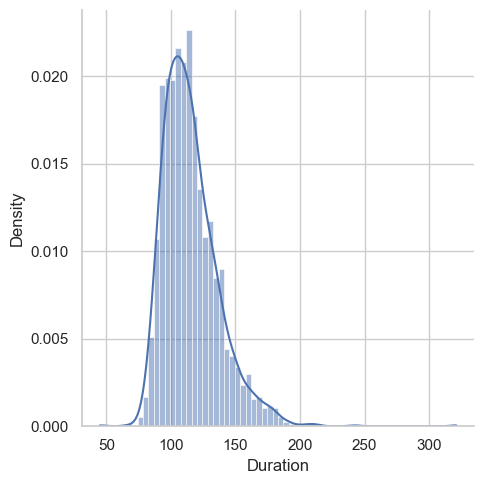

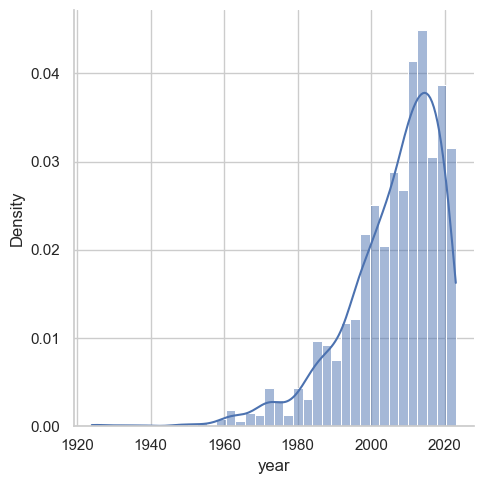

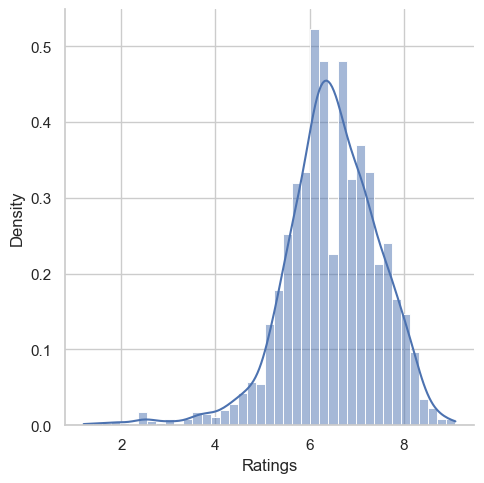

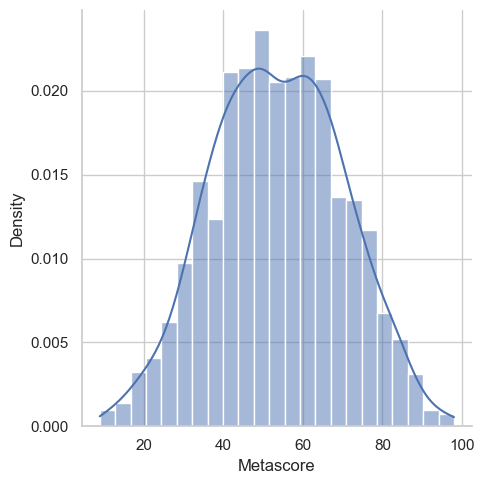

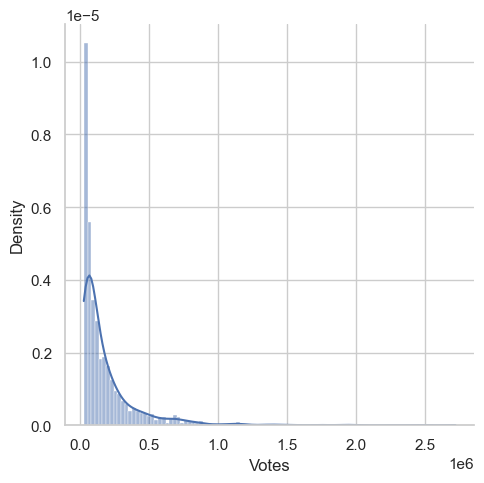

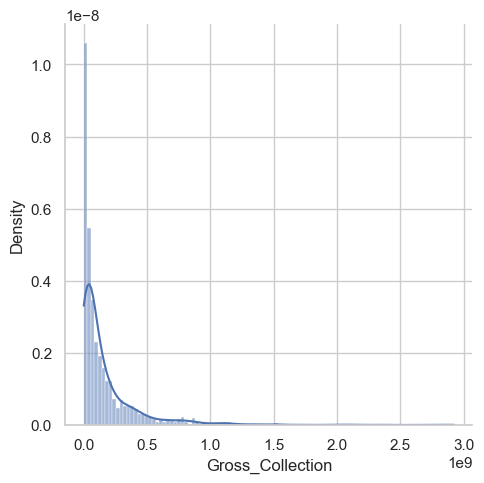

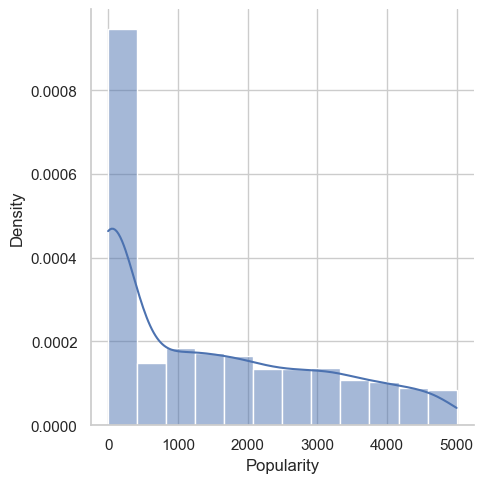

In [28]:
for i in Numerical_features:
    sns.displot(data=df, x=Numerical_features[i], kde=True, stat='density')
    plt.show()

#### Categorical features

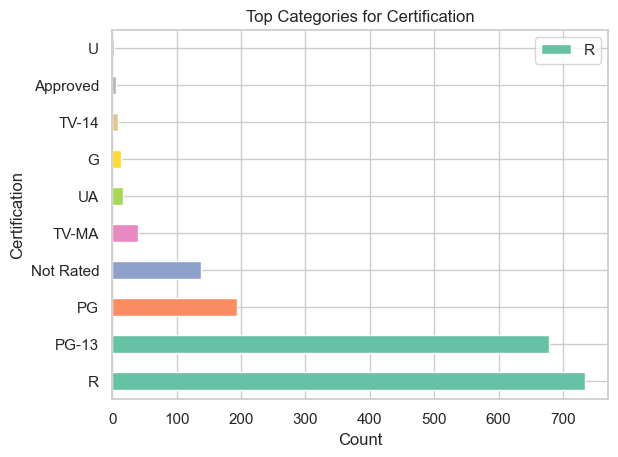

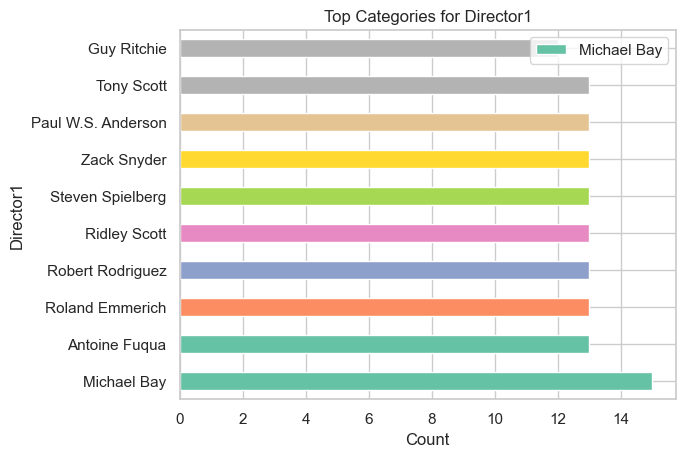

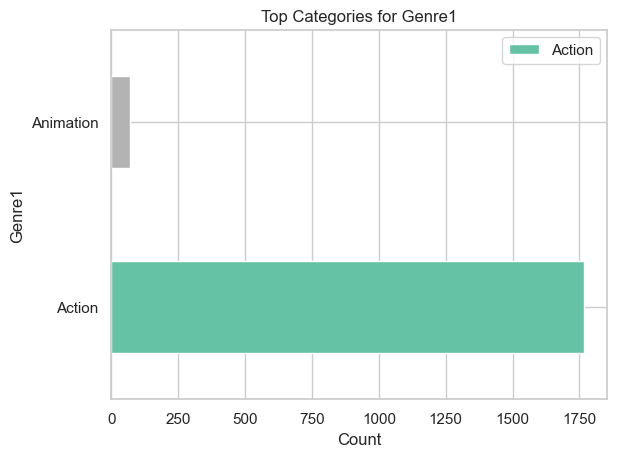

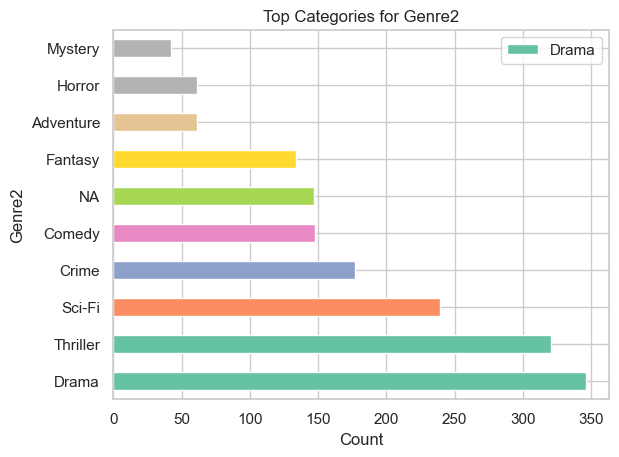

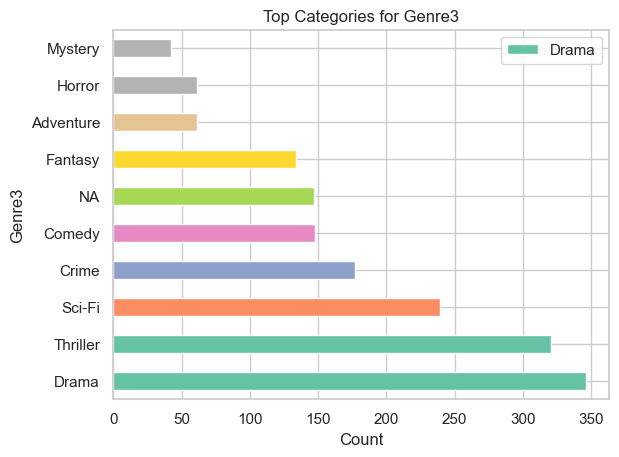

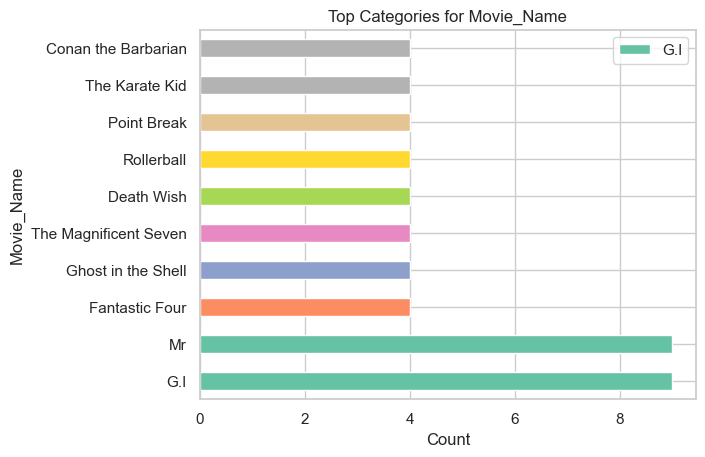

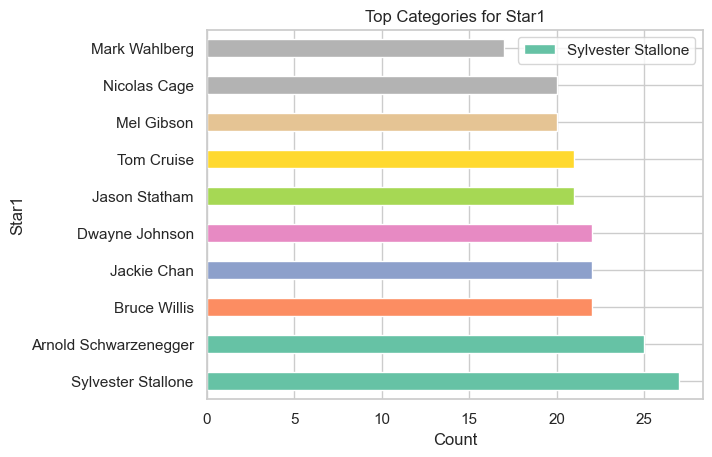

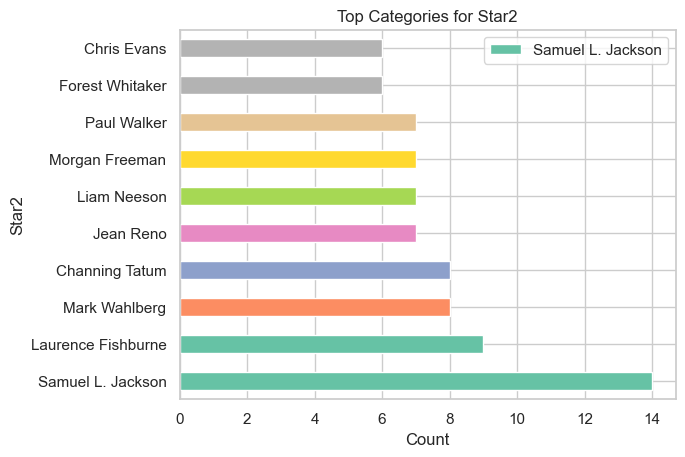

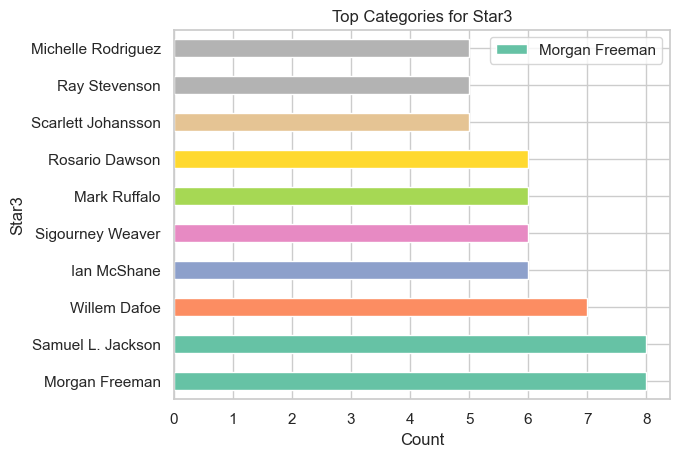

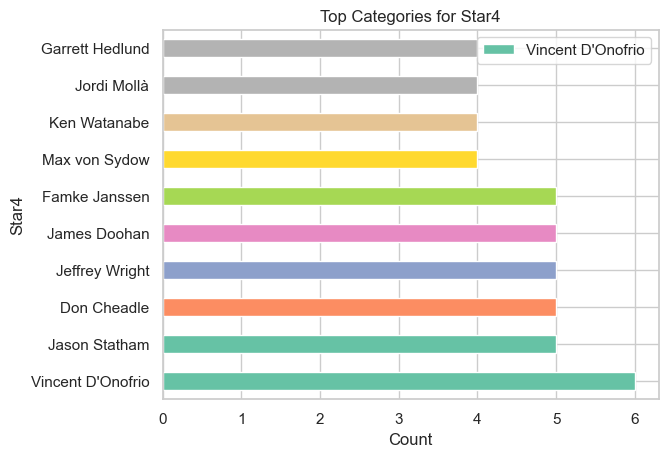

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Check count of categorical data for the best 7
for i in Categorical_features.columns.difference(['Director2', 'Director3']):
    counts = Categorical_features[i].value_counts().sort_values(ascending=False).head(10)
    
    # Generate a colormap with the same length as the categories
    colors = plt.cm.Set2(np.linspace(0, 1, len(counts)))

    # Plot the count of categories with different colors
    counts.plot(kind='barh', color=colors)
    
    plt.xlabel('Count')
    plt.ylabel(i)
    plt.title(f'Top Categories for {i}')
    
    # Add legend for the colors
    plt.legend(counts.index)

    # Display the plot
    plt.show()


#### Bivariate Analysis

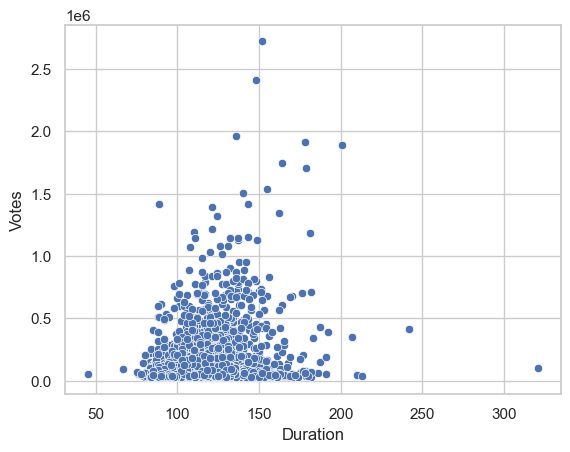

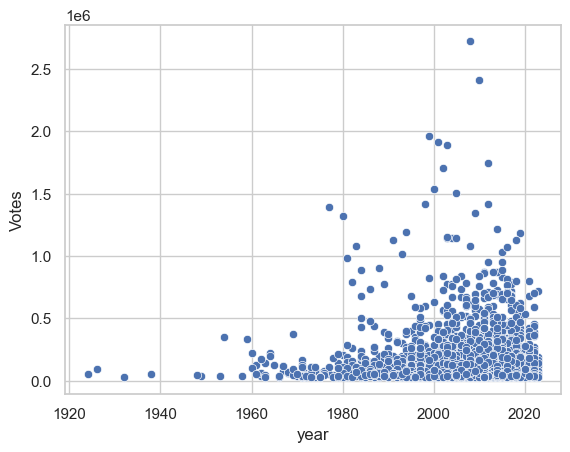

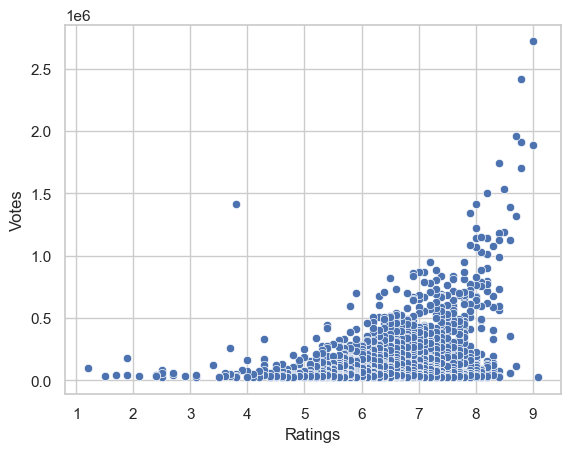

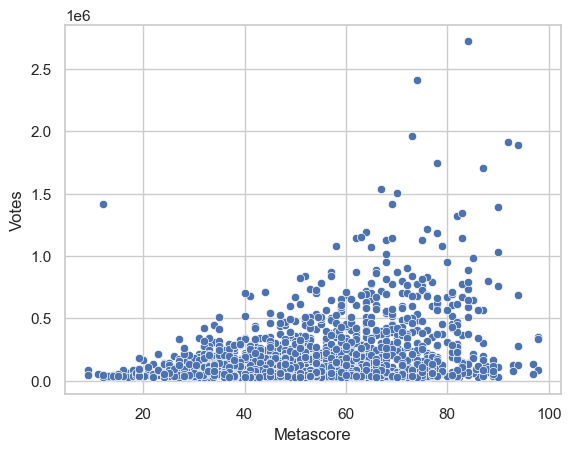

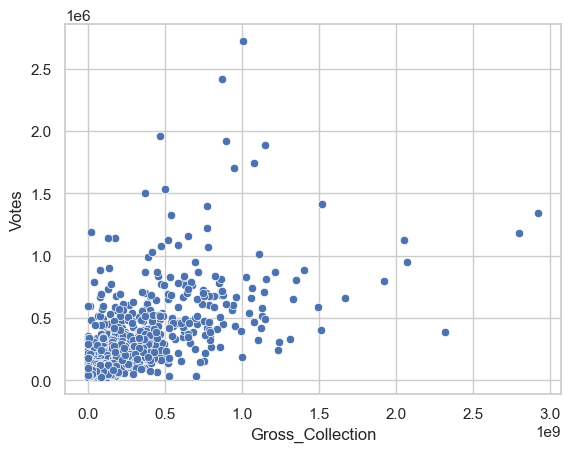

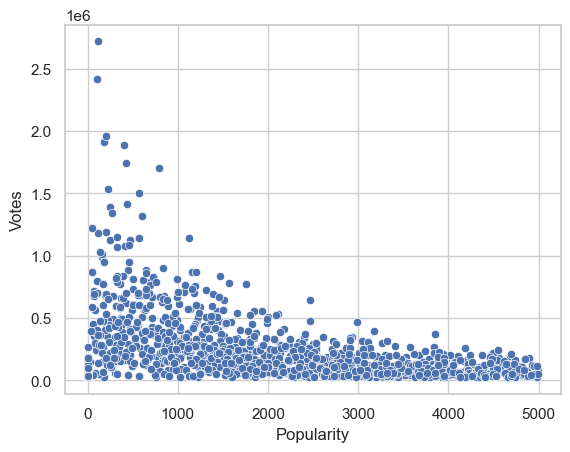

In [30]:
for i in Numerical_features.columns.drop(['Votes']):
    sns.scatterplot(x=i, y='Votes', data=Numerical_features)
    plt.show()

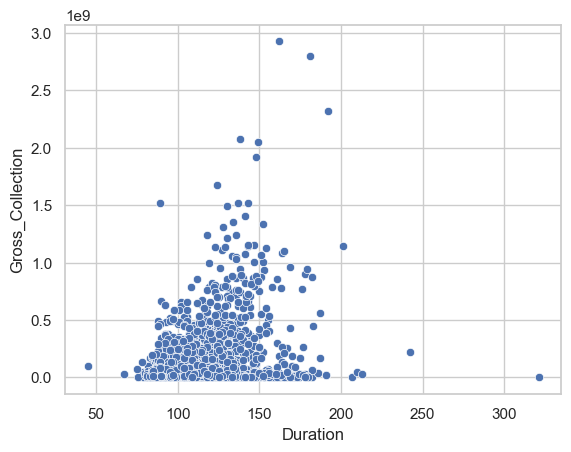

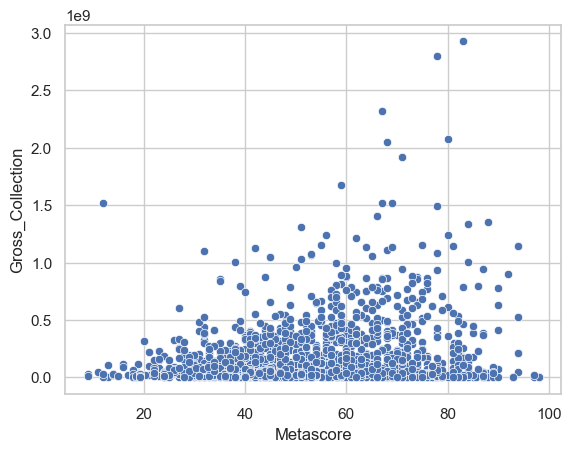

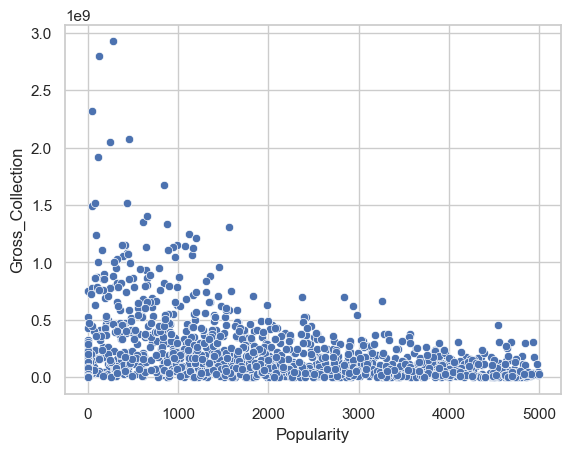

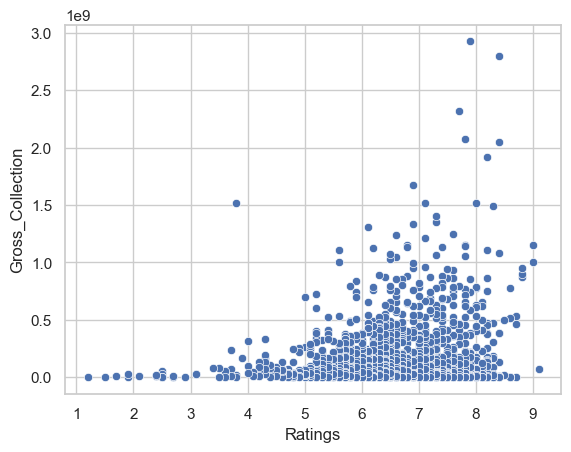

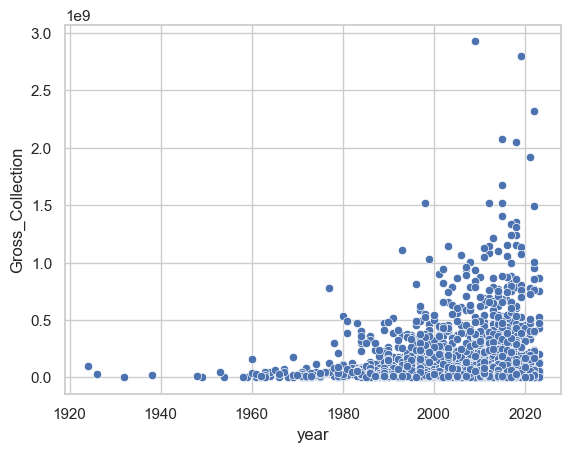

In [31]:
for i in Numerical_features.columns.difference(['Votes','Gross_Collection']):
    sns.scatterplot(x=i, y='Gross_Collection', data=Numerical_features)
    plt.show()

In [32]:
# Checking the relation between year and  Targets variables

df_sorted = df.sort_values(by='year')
fig = px.line(df_sorted, x='year', y='Votes',width=1500, height=600)
fig.show()

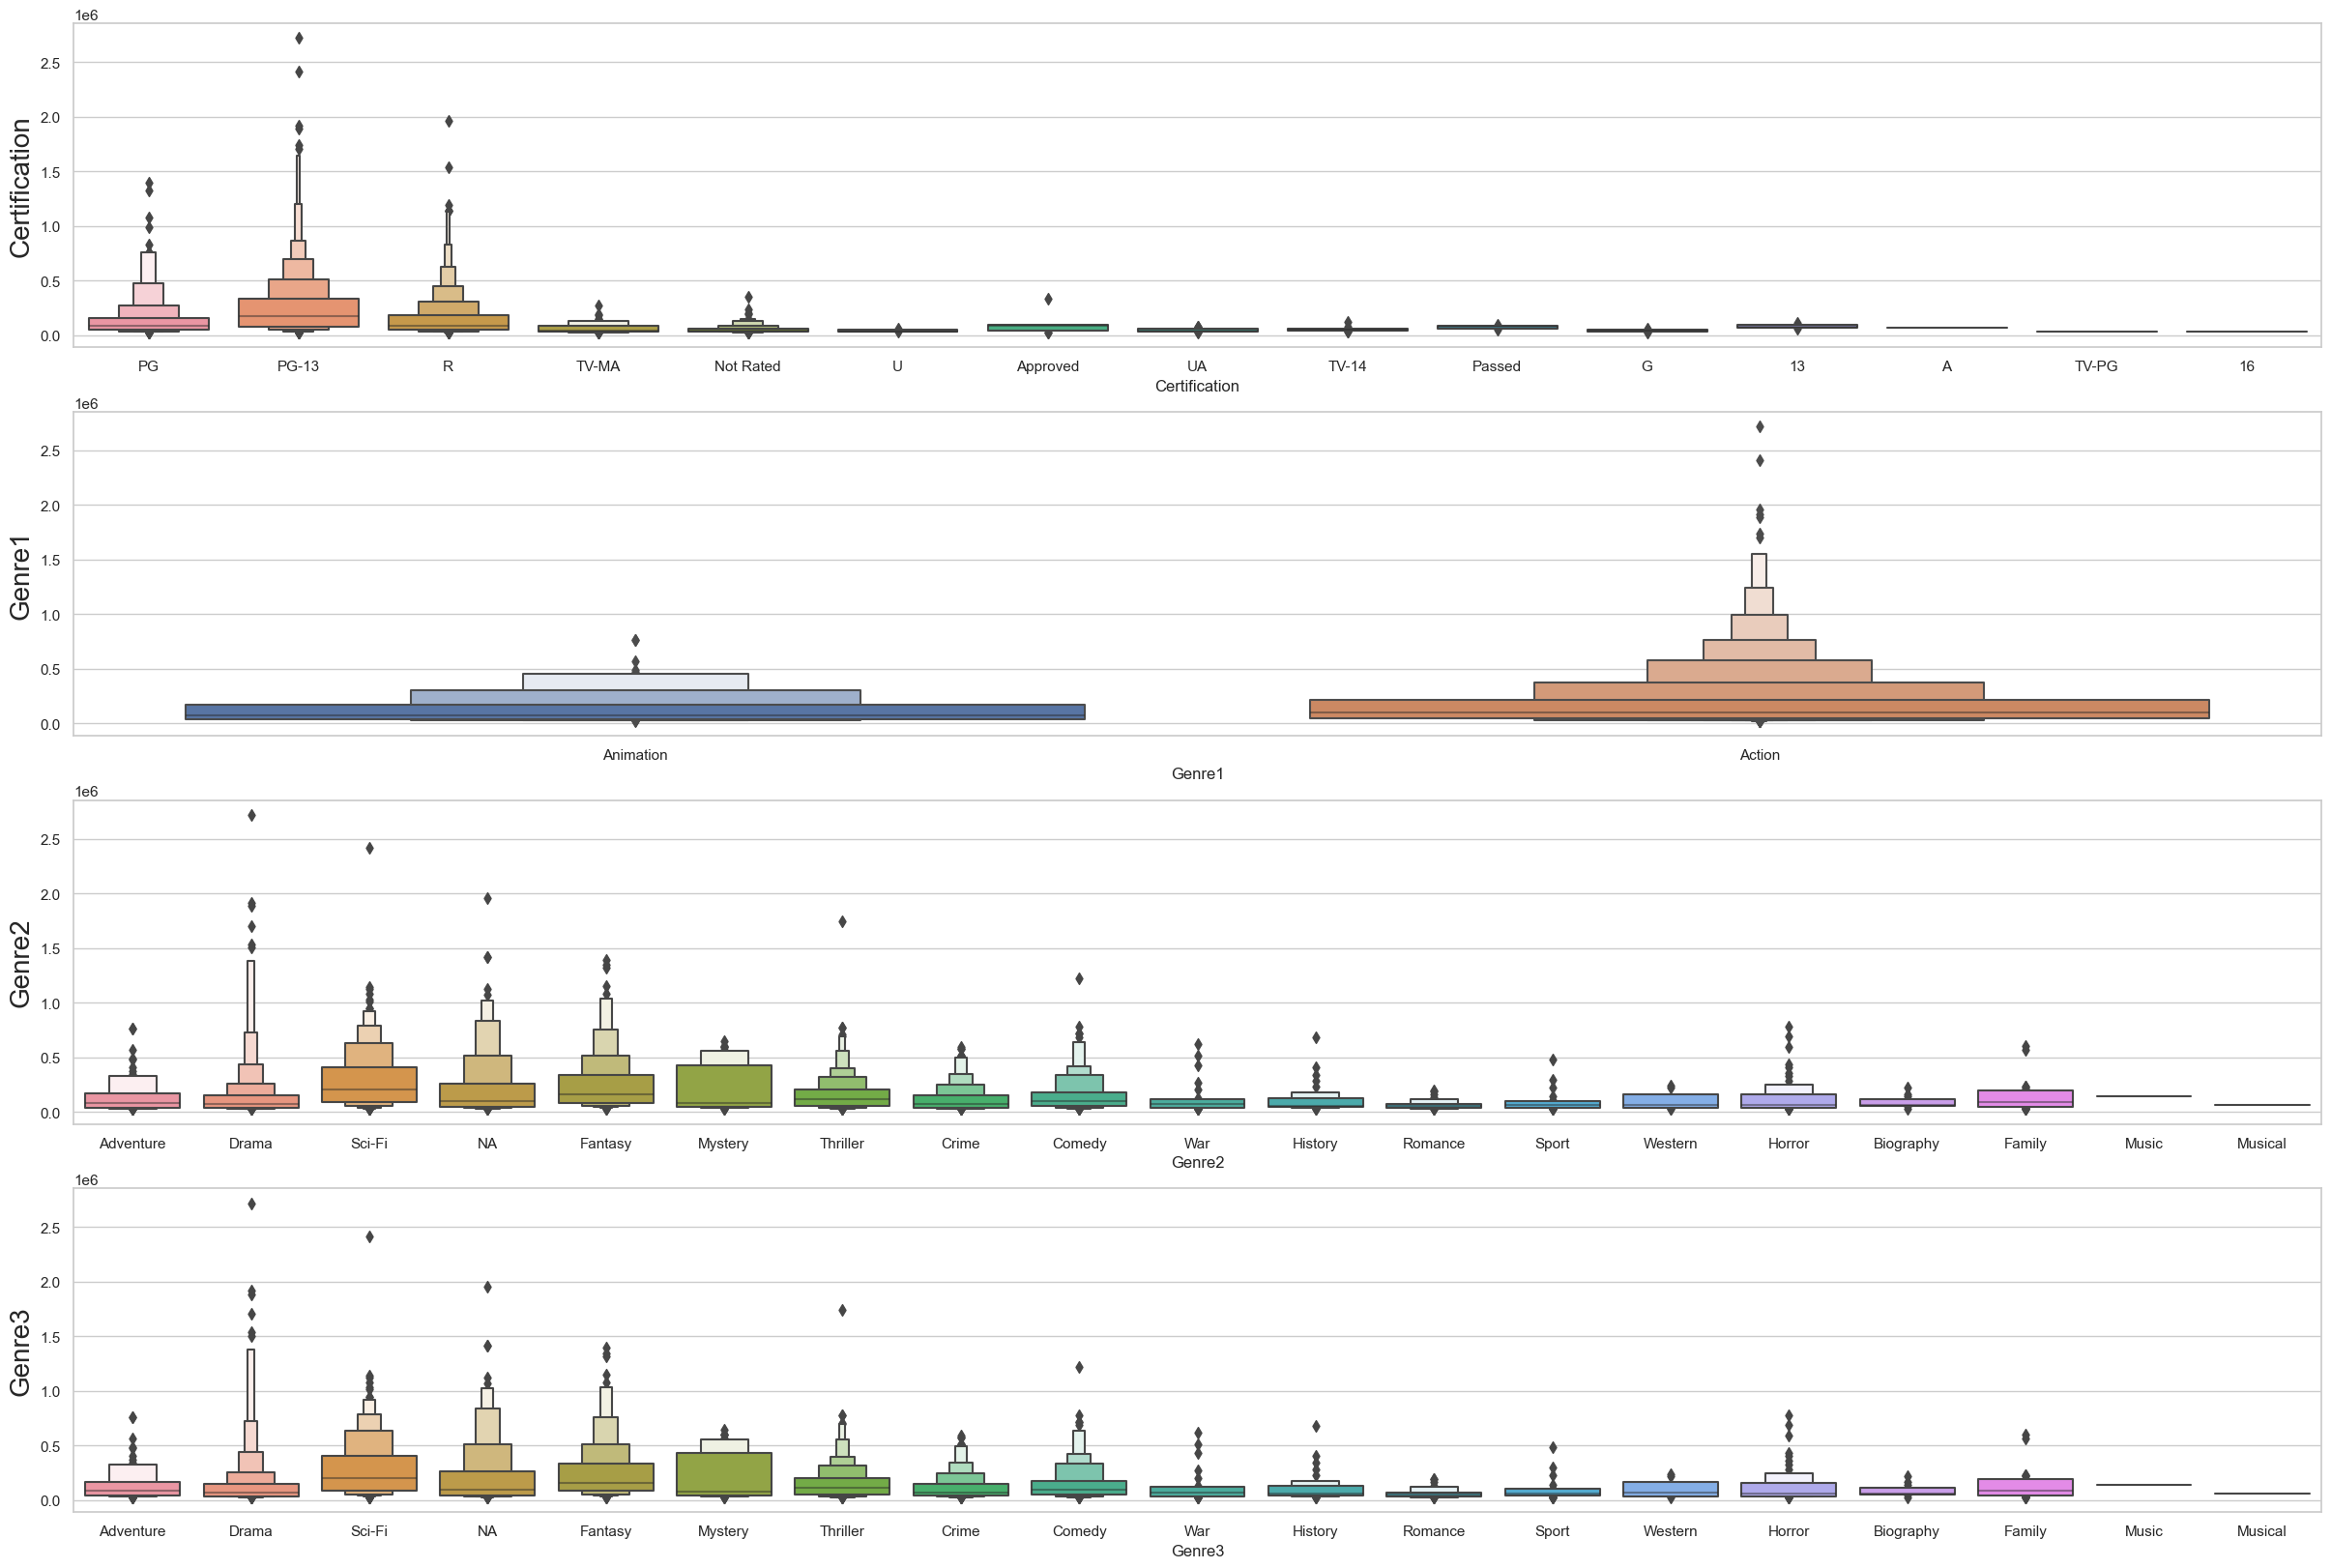

In [33]:
# Relationship between categorical columns and Target variable (Votes)

plt.figure(figsize=(30,20), facecolor='white')
plotnumber = 1

for i in ['Certification', 'Genre1', 'Genre2','Genre3']:
    if plotnumber<=4 :
        ax = plt.subplot(4,1,plotnumber)
        sns.boxenplot(y=df.Votes,x=df[i])
        plt.ylabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

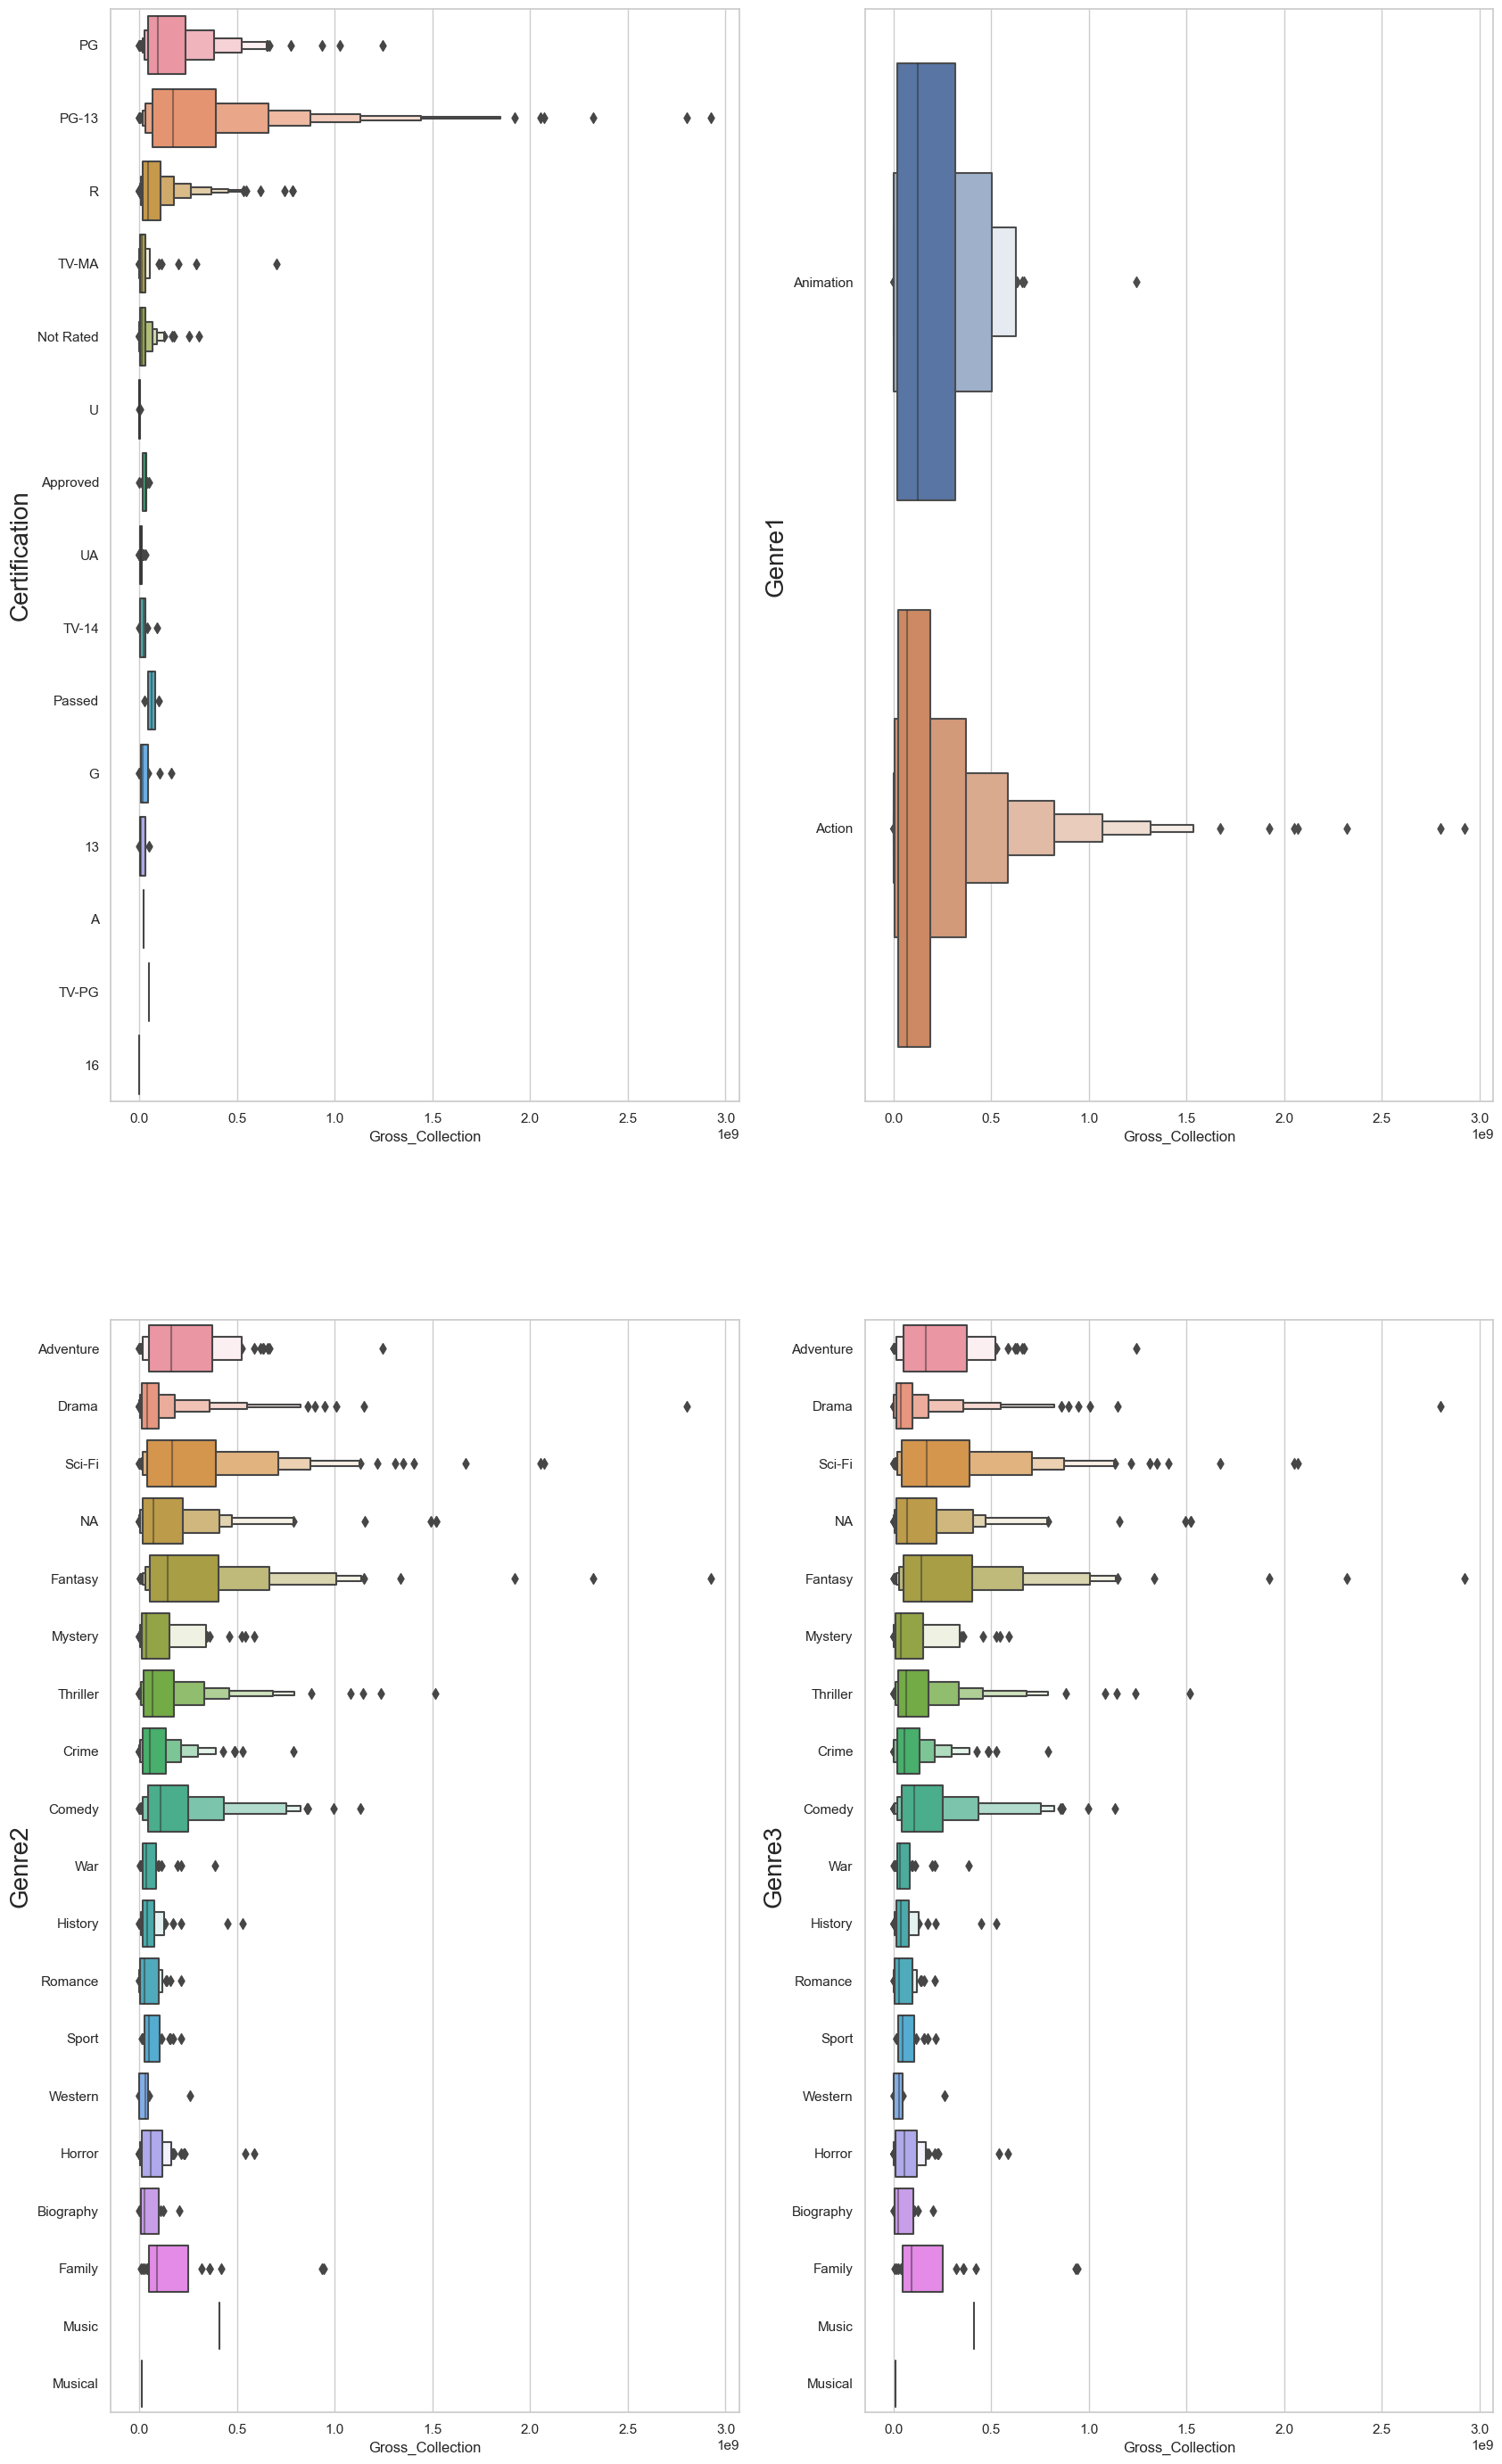

In [34]:
#Relationship between categorical columns and Target variable (Gross)

plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for i in ['Certification', 'Genre1', 'Genre2','Genre3']:
    if plotnumber<=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.boxenplot(x=df['Gross_Collection'],y=df[i])
        plt.ylabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

#### Multivariate analysis

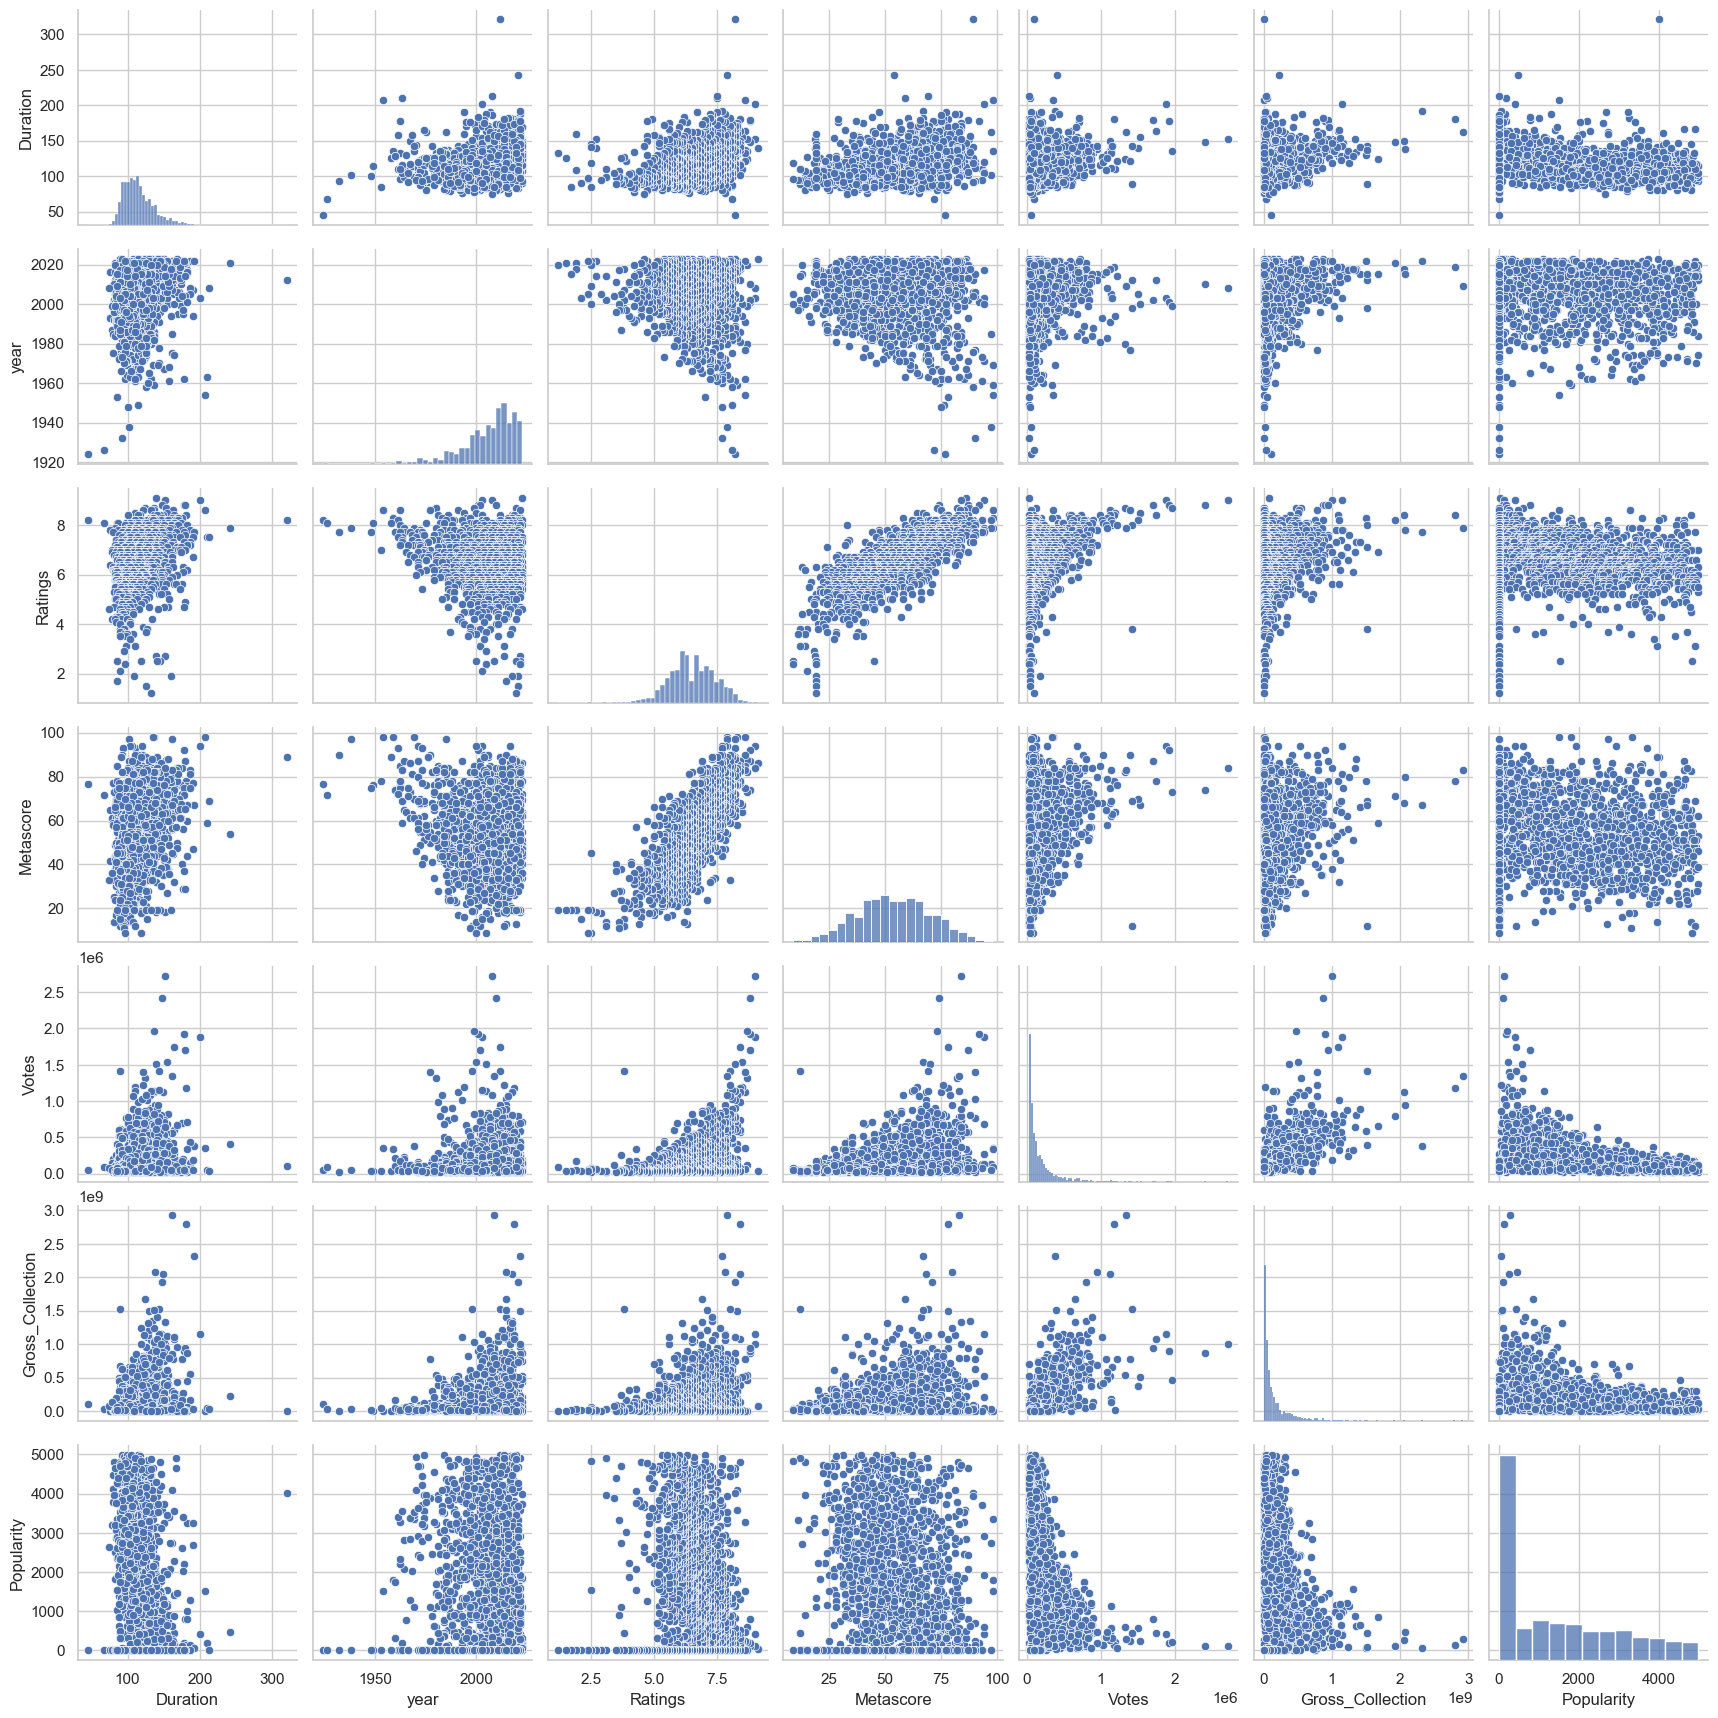

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
df.year.max()

2023

In [37]:
df['year_from_2023'] = 2023 - df['year']
gross['year_from_2023'] = 2023 - df['year']

In [38]:
df.drop('year',axis = 1,inplace=True)
gross.drop('year',axis = 1,inplace=True)

In [39]:
df.columns

Index(['Movie_Name', 'Director1', 'Director2', 'Director3', 'Duration', 'Ratings', 'Metascore',
       'Star1', 'Star2', 'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2', 'Genre3',
       'Gross_Collection', 'Popularity', 'Certification', 'year_from_2023'],
      dtype='object')

### Outlier Detection

In [40]:
Numerical_features = df.select_dtypes(include=['float64','int32','int64'])
Categorical_features = df.select_dtypes(include=['object'])

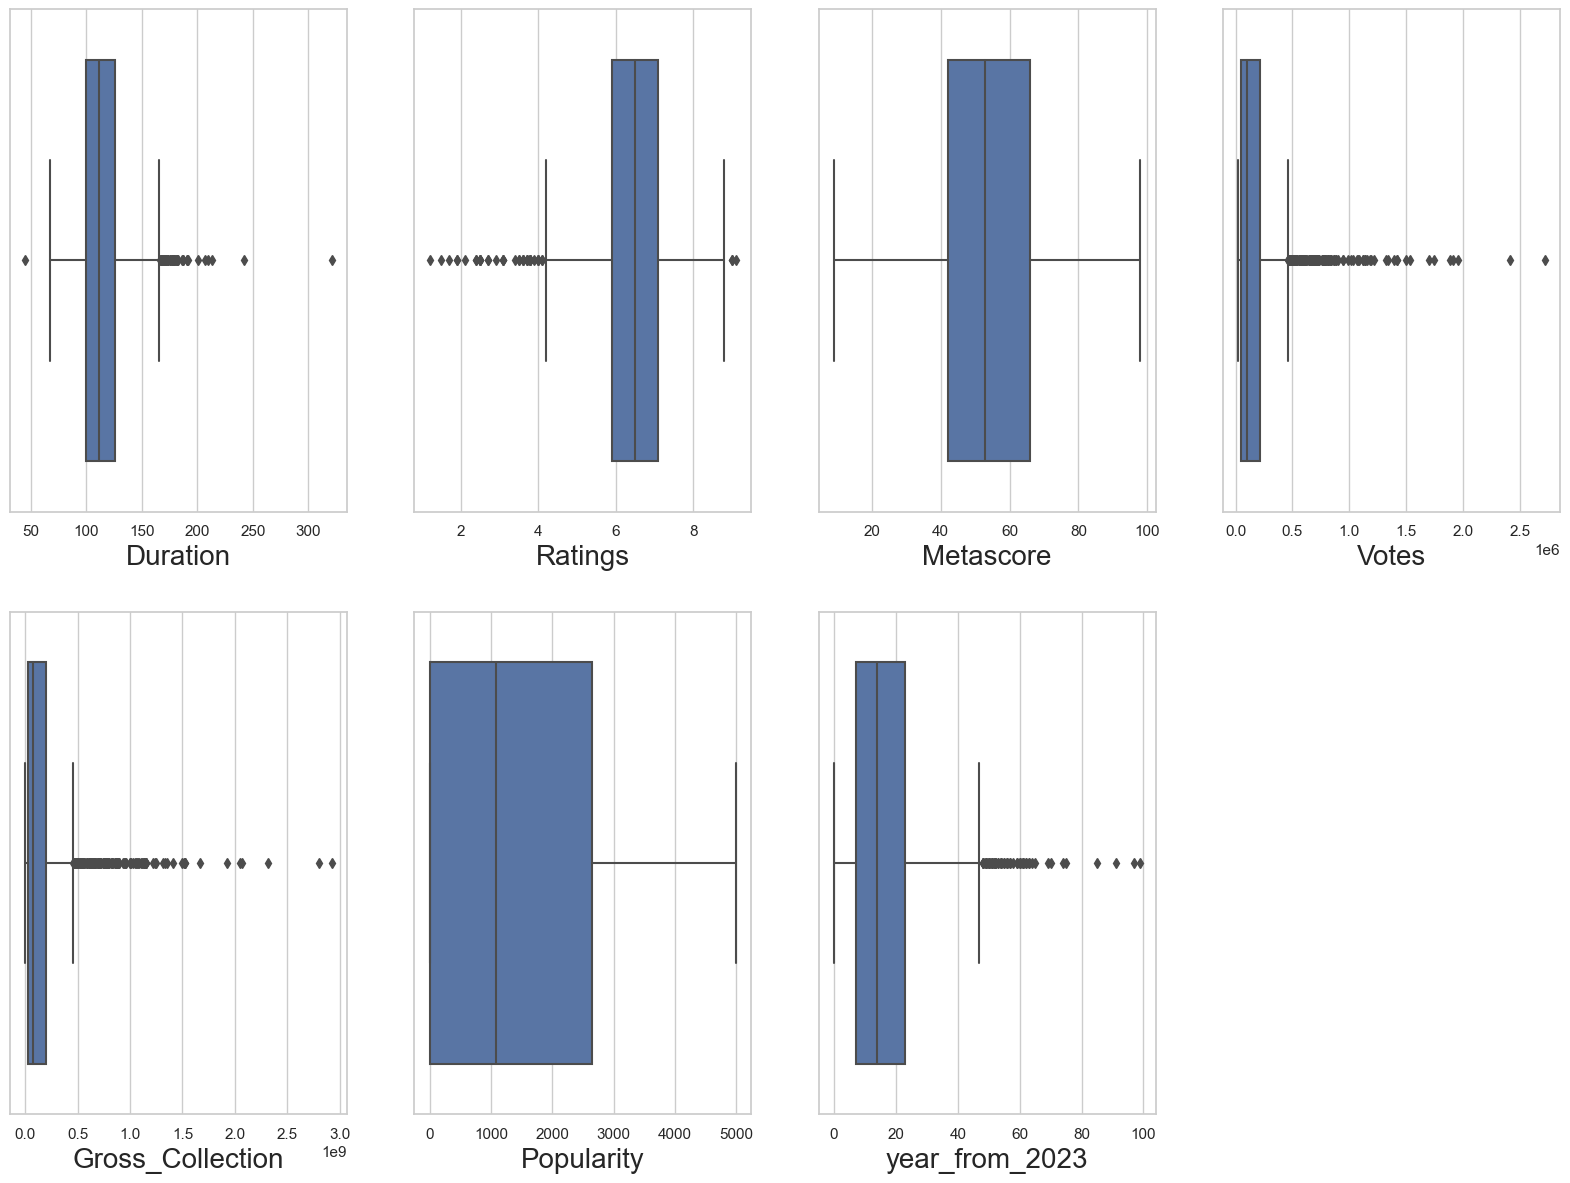

In [41]:
# Check outliers using boxplot
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=21:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### Observation

- The features `Duration`,`Ratings`,`Votes`,`Gross_Collection`,`year_from_2023` have Outliers

In [48]:
# use Z-score method
outliers=df[['Duration', 'year_from_2023', 'Ratings','Gross_Collection','Metascore', 'Popularity','Votes']]
z=np.abs(zscore(outliers))
df_new=df[(z<3).all(axis=1)]
df_new

Movie_Name           Director1     Director2           Director3  \
0       Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   Kemp Powers  Justin K. Thompson   
8                           Soorarai Pottru       Sudha Kongara            NA                  NA   
13                               Sita Ramam    Hanu Raghavapudi            NA                  NA   
16        Spider-Man: Into the Spider-Verse     Bob Persichetti  Peter Ramsey      Rodney Rothman   
20                                   Oldboy      Park Chan-wook            NA                  NA   
...                                     ...                 ...           ...                 ...   
1815                     Dungeons & Dragons    Courtney Solomon            NA                  NA   
1816            Mortal Kombat: Annihilation    John R. Leonetti            NA                  NA   
1817                                 Crimea     Aleksey Pimanov            NA                  NA   
1818                              Barb Wire         David Hogan            NA                  NA   
1819  Spy Kids 4: All the Time in the World    Robert Rodriguez            NA                  NA   

      Duration  Ratings  Metascore            Star1             Star2              Star3  \
0          140      9.1       86.0    Shameik Moore  Hailee Steinfeld        Oscar Isaac   
8          153      8.7       87.6           Suriya      Paresh Rawal  Aparna Balamurali   
13         163      8.6       83.2  Dulquer Salmaan     Mrunal Thakur  Rashmika Mandanna   
16         117      8.4       87.0    Shameik Moore      Jake Johnson   Hailee Steinfeld   
20         101      8.4       77.0     Choi Min-sik        Yoo Ji-tae     Kang Hye-jeong   
...        ...      ...        ...              ...               ...                ...   
1815       107      3.6       14.0    Justin Whalin      Jeremy Irons       Zoe McLellan   
1816        95      3.6       11.0       Robin Shou       Talisa Soto        James Remar   
1817        99      3.6       28.0    Roman Kurtsyn   Evgeniya Lapova      Pavel Kraynov   
1818        98      3.5       40.0  Pamela Anderson     Amir AboulEla  Adriana Alexander   
1819        89      3.5       37.0     Jessica Alba      Jeremy Piven        Joel McHale   

                Star4   Votes     Genre1     Genre2     Genre3  Gross_Collection  Popularity  \
0        Jake Johnson   29474  Animation  Adventure  Adventure        69100000.0        23.0   
8             Urvashi  119526     Action         NA         NA         1662536.8         0.0   
13            Sumanth   59972     Action    Mystery    Mystery         2208029.0         0.0   
16     Mahershala Ali  568783  Animation  Adventure  Adventure       384256930.0        86.0   
20      Kim Byeong-Ok  596589     Action    Mystery    Mystery        15421226.0       314.0   
...               ...     ...        ...        ...        ...               ...         ...   
1815      Bruce Payne   35154     Action    Fantasy    Fantasy        33978694.0       902.0   
1816      Sandra Hess   56425     Action    Fantasy    Fantasy        51376861.0      3314.0   
1817   Pavel Trubiner   33481     Action         NA         NA         5904389.0         0.0   
1818   David Andriole   30308     Action         NA         NA         3793614.0      4402.0   
1819  Rowan Blanchard   26945     Action     Comedy     Comedy        85564310.0         0.0   

     Certification  year_from_2023  
0               PG               0  
8            TV-MA               3  
13               U               1  
16              PG               5  
20               R              20  
...            ...             ...  
1815         PG-13              23  
1816         PG-13              26  
1817     Not Rated               6  
1818             R              27  
1819            PG              12  

[1720 rows x 19 columns]

In [49]:
loss_percentage= ((df.shape[0]- df_new.shape[0])/df.shape[0])*100
loss_percentage

6.369080021774633

- The data loss is only 6.36 percent which is acceptable

### Skewness

In [50]:
# Check Skewness
df_new.skew()

Duration            0.850310
Ratings            -0.248104
Metascore           0.044348
Votes               1.997704
Gross_Collection    2.071646
Popularity          0.615385
year_from_2023      0.954567
dtype: float64

- The features `Duration`,`Votes`,`Gross_Collection`,`Popularity`,`year_from_2023` have skewnes

In [54]:
# Sort columns by datatypes
df_new.columns.to_series().groupby(df_new.dtypes).groups

{int32: ['Duration', 'Votes'], int64: ['year_from_2023'], float64: ['Ratings', 'Metascore', 'Gross_Collection', 'Popularity'], object: ['Movie_Name', 'Director1', 'Director2', 'Director3', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3', 'Certification']}

In [58]:
# withing Power transformer to treat skewness
skew_cols=['Votes','Gross_Collection','Duration','year_from_2023']
scaler = PowerTransformer()
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

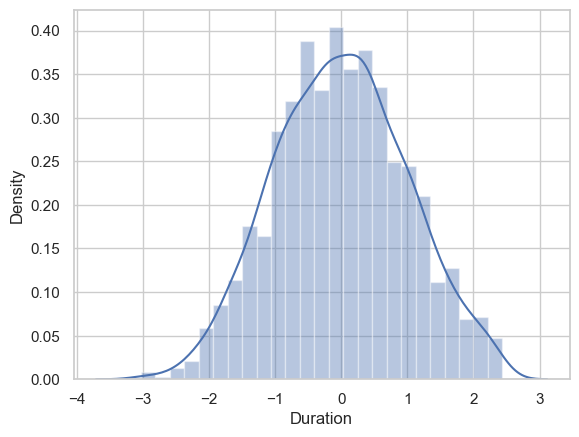

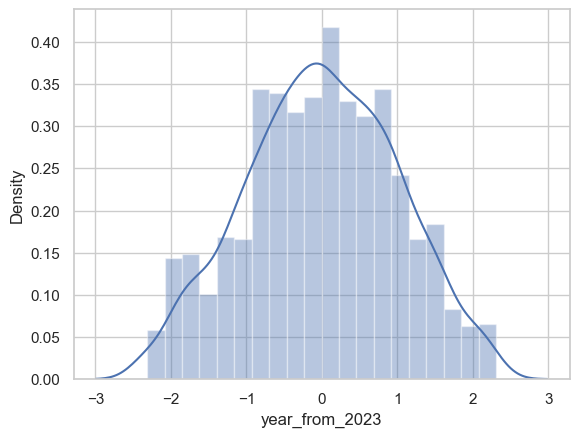

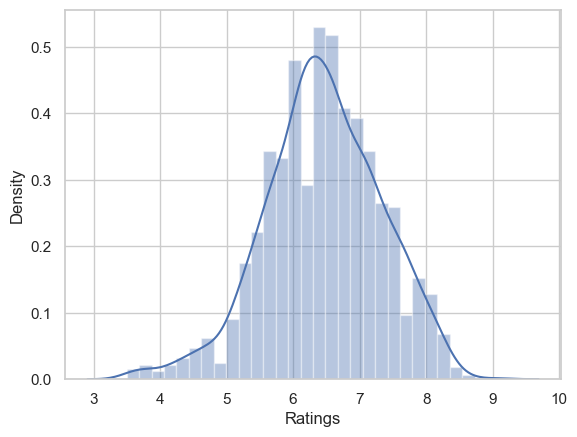

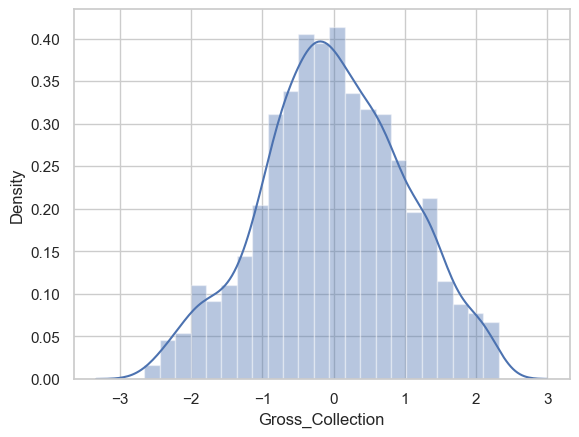

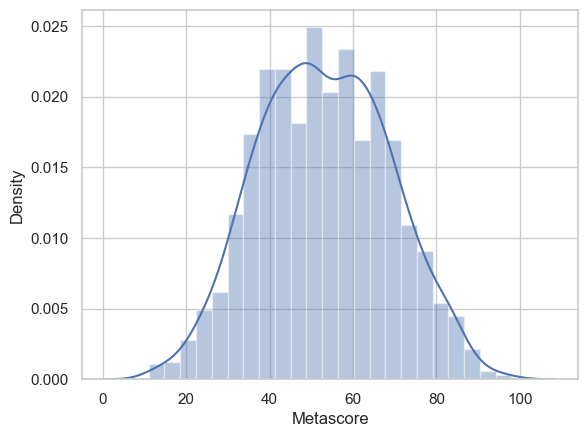

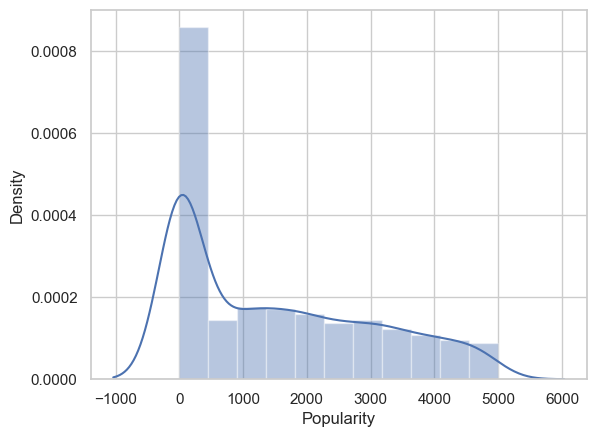

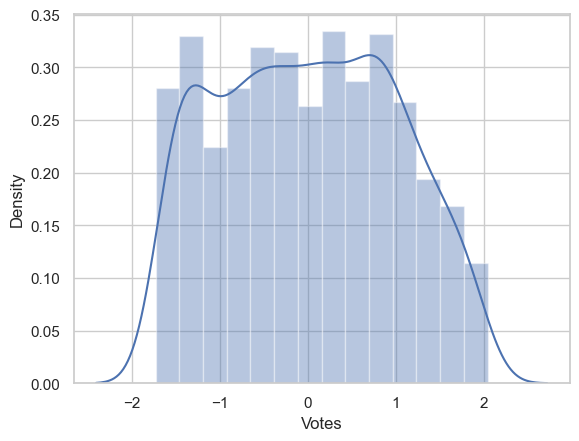

In [60]:
for i in ['Duration', 'year_from_2023', 'Ratings','Gross_Collection','Metascore', 'Popularity','Votes']:
    sns.distplot(df_new[i])
    plt.show()

In [61]:
df_new.skew()

Duration            0.021965
Ratings            -0.248104
Metascore           0.044348
Votes               0.067678
Gross_Collection   -0.060699
Popularity          0.615385
year_from_2023     -0.052803
dtype: float64

Lets drop the `Movie_Name` feature since its uncessary

In [63]:
df_new.drop(columns=['Movie_Name'],axis=1,inplace=True)

### Encoding the Categorical Features

We will perform One hot Encoding for the Categorical features

In [64]:
df_new = pd.get_dummies(df_new,columns=['Genre1','Genre2','Genre3','Certification'],drop_first=True)

In [65]:
# Calculate the frequency of each category
for i in ['Director1','Star1', 'Star2','Star3', 'Star4','Director2','Director3']:
    frequency = df_new[i].value_counts(normalize=True)
    # Create a new column with the frequency encoding
    df_new[i] = df_new[i].map(frequency)
# Display the DataFrame with the frequency encoded columns
df_new

Director1  Director2  Director3  Duration  Ratings  Metascore     Star1     Star2     Star3  \
0      0.000581   0.000581   0.000581  1.323547      9.1       86.0  0.001163  0.001163  0.000581   
8      0.000581   0.941279   0.993605  1.749810      8.7       87.6  0.000581  0.001163  0.000581   
13     0.000581   0.941279   0.993605  2.031218      8.6       83.2  0.000581  0.001163  0.001163   
16     0.000581   0.000581   0.000581  0.336176      8.4       87.0  0.001163  0.000581  0.001163   
20     0.001744   0.941279   0.993605 -0.616916      8.4       77.0  0.001163  0.001163  0.001163   
...         ...        ...        ...       ...      ...        ...       ...       ...       ...   
1815   0.000581   0.941279   0.993605 -0.226021      3.6       14.0  0.000581  0.001744  0.000581   
1816   0.000581   0.941279   0.993605 -1.057284      3.6       11.0  0.000581  0.000581  0.001163   
1817   0.000581   0.941279   0.993605 -0.757765      3.6       28.0  0.000581  0.000581  0.000581   
1818   0.000581   0.941279   0.993605 -0.830350      3.5       40.0  0.000581  0.000581  0.000581   
1819   0.006977   0.941279   0.993605 -1.557102      3.5       37.0  0.000581  0.000581  0.000581   

         Star4     Votes  Gross_Collection  Popularity  year_from_2023  Genre1_Animation  \
0     0.000581 -1.490877         -0.004366        23.0       -2.315402                 1   
8     0.000581  0.272613         -1.648812         0.0       -1.393765                 0   
13    0.000581 -0.531116         -1.566356         0.0       -1.910630                 0   
16    0.001163  1.711534          1.362563        86.0       -1.027387                 1   
20    0.001163  1.748520         -0.834498       314.0        0.500162                 0   
...        ...       ...               ...         ...             ...               ...   
1815  0.000581 -1.239190         -0.432282       902.0        0.706410                 0   
1816  0.000581 -0.607956         -0.191396      3314.0        0.896574                 0   
1817  0.000581 -1.307894         -1.235981         0.0       -0.873762                 0   
1818  0.000581 -1.450400         -1.393665      4402.0        0.956904                 0   
1819  0.000581 -1.622642          0.138479         0.0       -0.165395                 0   

      Genre2_Biography  Genre2_Comedy  Genre2_Crime  Genre2_Drama  Genre2_Family  Genre2_Fantasy  \
0                    0              0             0             0              0               0   
8                    0              0             0             0              0               0   
13                   0              0             0             0              0               0   
16                   0              0             0             0              0               0   
20                   0              0             0             0              0               0   
...                ...            ...           ...           ...            ...             ...   
1815                 0              0             0             0              0               1   
1816                 0              0             0             0              0               1   
1817                 0              0             0             0              0               0   
1818                 0              0             0             0              0               0   
1819                 0              1             0             0              0               0   

      Genre2_History  Genre2_Horror  Genre2_Music  Genre2_Mystery  Genre2_NA  Genre2_Romance  \
0                  0              0             0               0          0               0   
8                  0              0             0               0          1               0   
13                 0              0             0               1          0               0   
16                 0              0             0               0          0               0   
20     

### Correlation

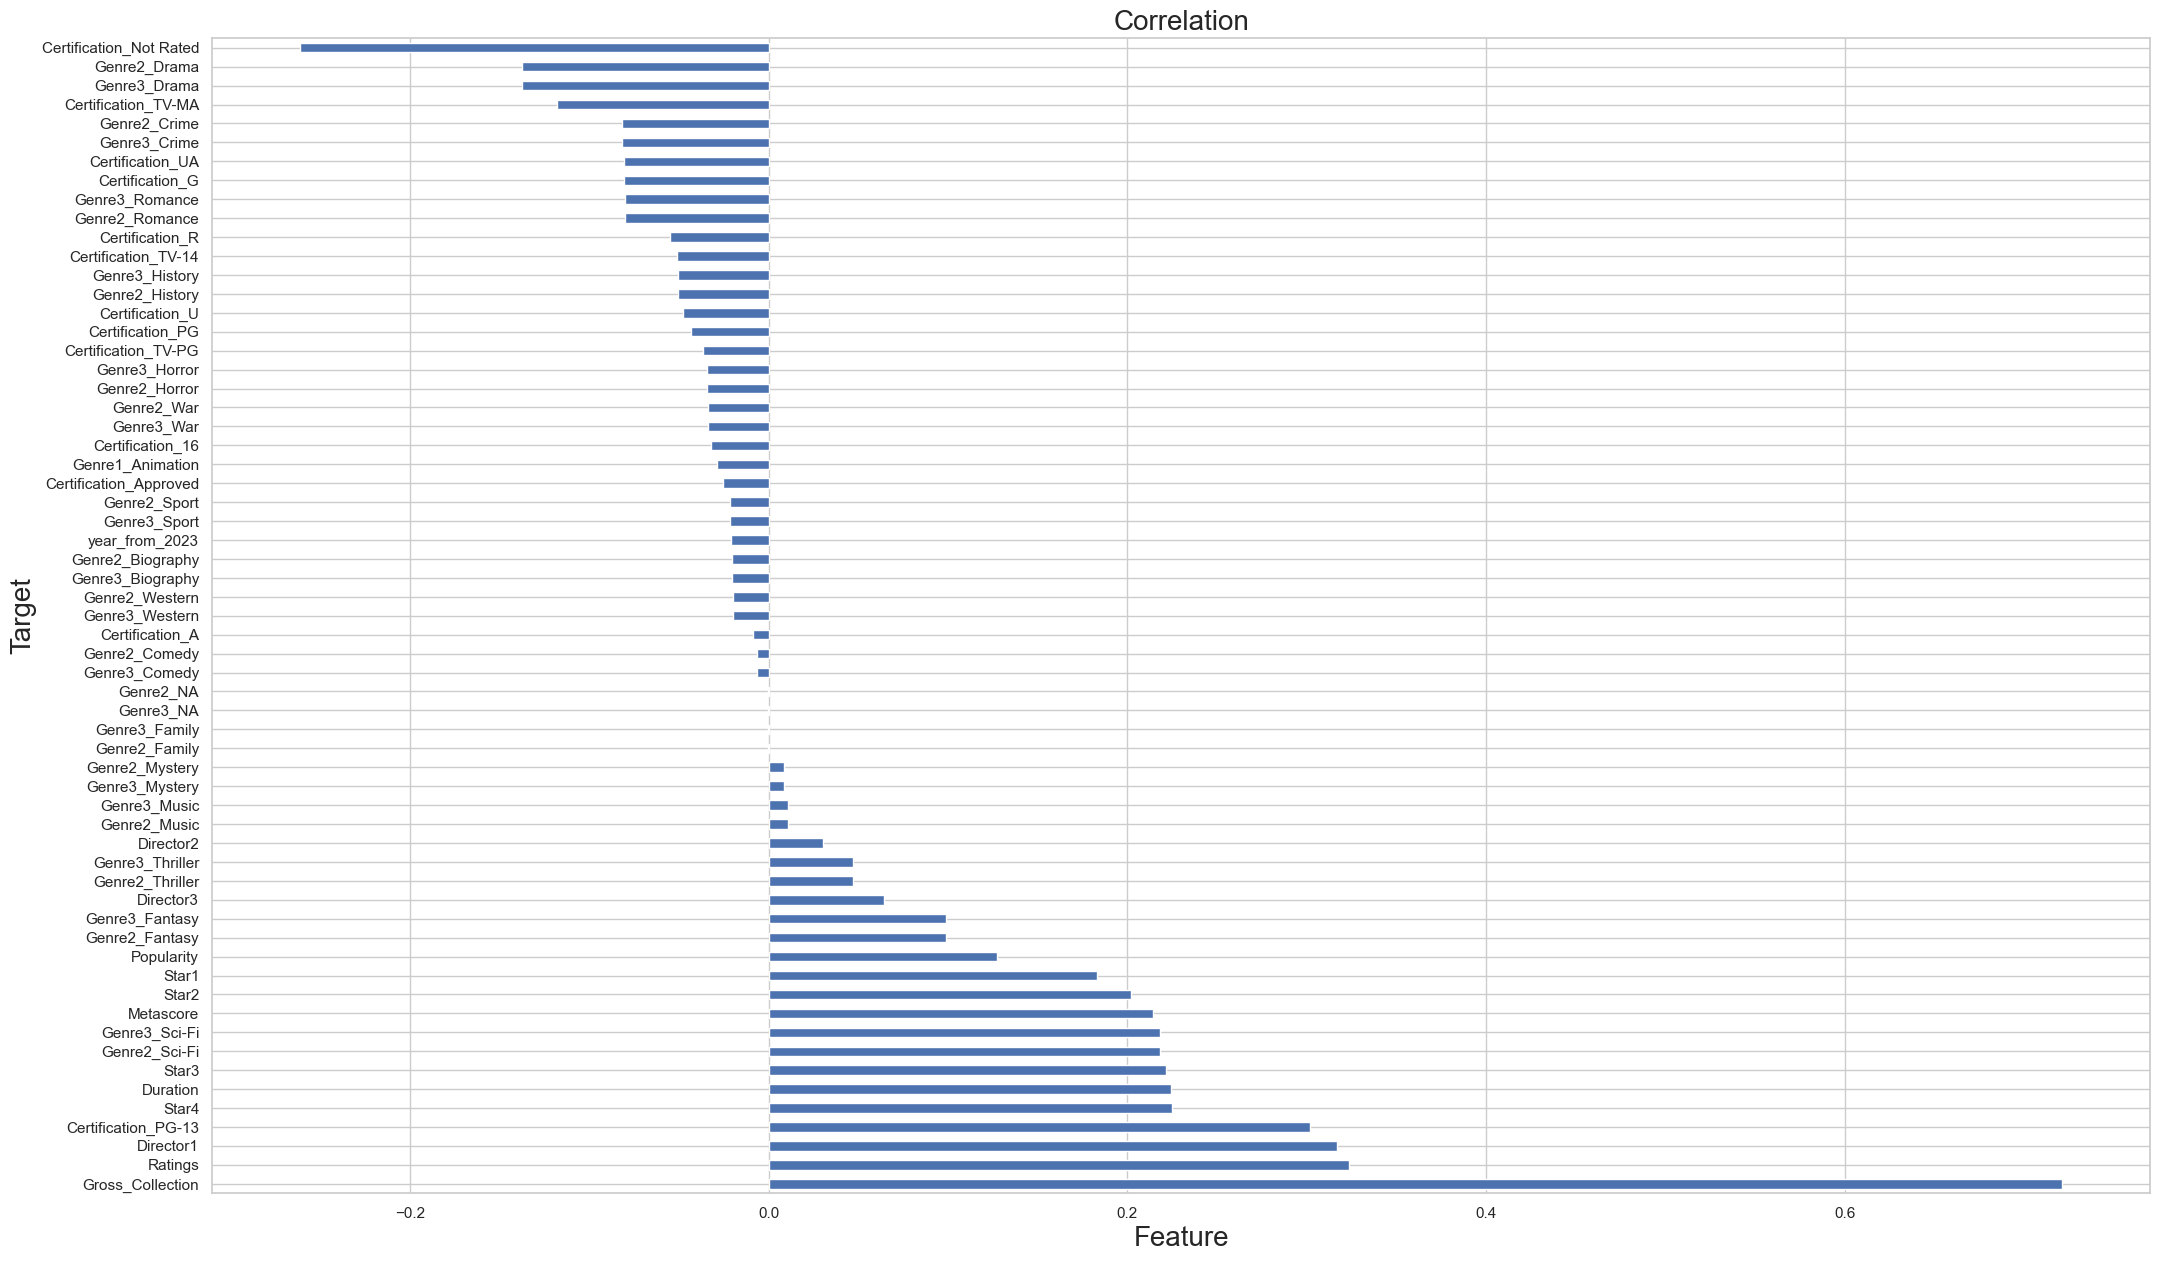

In [68]:
#Visualization of the Correlation Metrics for using Votes as target feature
plt.figure(figsize = (25, 15))

df_new.corr()['Votes'].sort_values(ascending = False).drop(['Votes']).plot(kind = 'barh', color = 'b')
plt.xlabel('Feature', fontsize = 20)
plt.ylabel('Target', fontsize = 20)
plt.title('Correlation', fontsize = 20)
plt.show()

- There are features which are Positively as well as Negatively Correlated with the Target features

#### Test Data

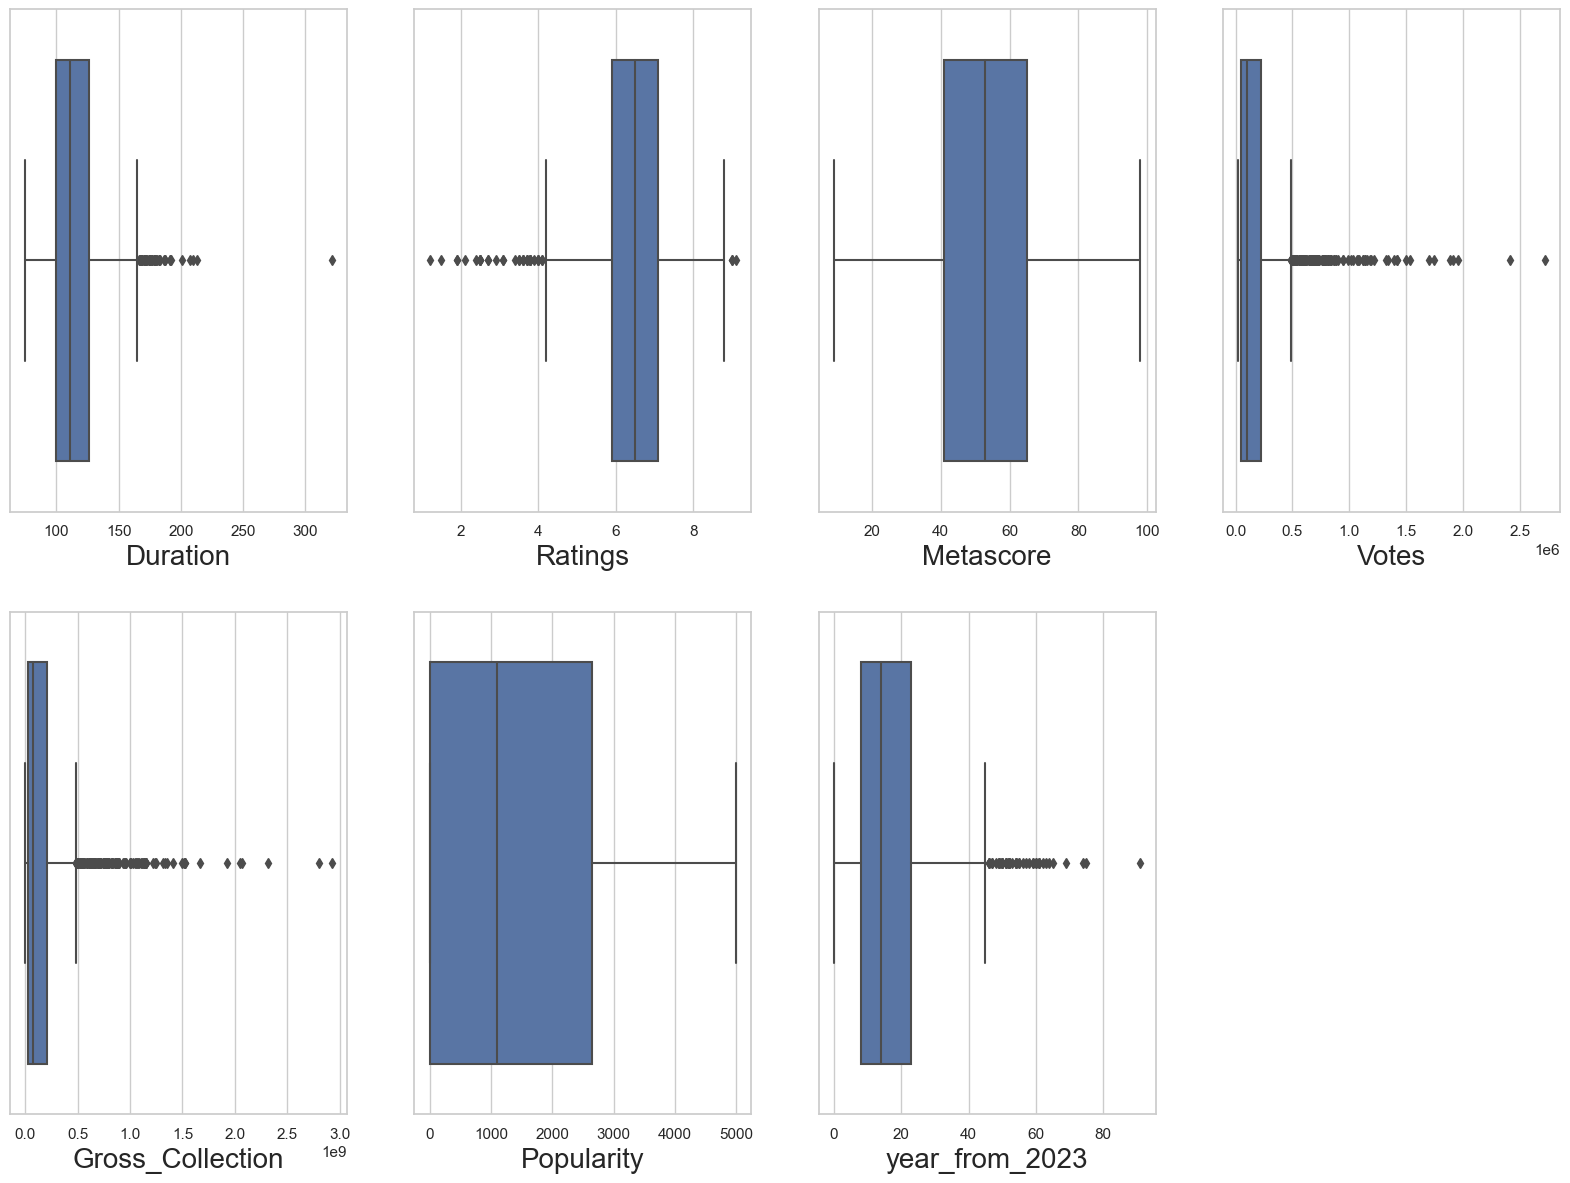

In [71]:
# Check outliers using boxplot
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=21:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(gross[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Removing the Outlier for Test Data

In [72]:
# use Z-score method
outliers=gross[['Duration', 'year_from_2023', 'Ratings','Gross_Collection','Metascore', 'Popularity','Votes']]
z=np.abs(zscore(outliers))
Gross_new = gross[(z<3).all(axis=1)]
Gross_new

Movie_Name           Director1     Director2  \
0             Spider-Man: Across the Spider-Verse  Joaquim Dos Santos   Kemp Powers   
13                                     Sita Ramam    Hanu Raghavapudi            NA   
16              Spider-Man: Into the Spider-Verse     Bob Persichetti  Peter Ramsey   
20                                         Oldboy      Park Chan-wook            NA   
21                                         Oldboy      Park Chan-wook            NA   
...                                           ...                 ...           ...   
1813  The Adventures of Sharkboy and Lavagirl 3-D    Robert Rodriguez            NA   
1814             Superman IV: The Quest for Peace     Sidney J. Furie            NA   
1815                           Dungeons & Dragons    Courtney Solomon            NA   
1816                  Mortal Kombat: Annihilation    John R. Leonetti            NA   
1817                                       Crimea     Aleksey Pimanov            NA   

               Director3  Duration  Ratings  Metascore              Star1             Star2  \
0     Justin K. Thompson       140      9.1       86.0      Shameik Moore  Hailee Steinfeld   
13                    NA       163      8.6       83.2    Dulquer Salmaan     Mrunal Thakur   
16        Rodney Rothman       117      8.4       87.0      Shameik Moore      Jake Johnson   
20                    NA       101      8.4       77.0       Choi Min-sik        Yoo Ji-tae   
21                    NA       101      8.4       77.0        Josh Brolin   Elizabeth Olsen   
...                  ...       ...      ...        ...                ...               ...   
1813                  NA        93      3.7       38.0        Cayden Boyd      George Lopez   
1814                  NA        90      3.7       24.0  Christopher Reeve      Gene Hackman   
1815                  NA       107      3.6       14.0      Justin Whalin      Jeremy Irons   
1816                  NA        95      3.6       11.0         Robin Shou       Talisa Soto   
1817                  NA        99      3.6       28.0      Roman Kurtsyn   Evgeniya Lapova   

                  Star3           Star4   Votes     Genre1     Genre2     Genre3  \
0           Oscar Isaac    Jake Johnson   29474  Animation  Adventure  Adventure   
13    Rashmika Mandanna         Sumanth   59972     Action    Mystery    Mystery   
16     Hailee Steinfeld  Mahershala Ali  568783  Animation  Adventure  Adventure   
20       Kang Hye-jeong   Kim Byeong-Ok  596589     Action    Mystery    Mystery   
21    Samuel L. Jackson  Sharlto Copley   78271     Action    Mystery    Mystery   
...                 ...             ...     ...        ...        ...        ...   
1813      Kristin Davis  David Arquette   39960     Action     Comedy     Comedy   
1814      Margot Kidder   Jackie Cooper   50643     Action     Sci-Fi     Sci-Fi   
1815       Zoe McLellan     Bruce Payne   35154     Action    Fantasy    Fantasy   
1816        James Remar     Sandra Hess   56425     Action    Fantasy    Fantasy   
1817      Pavel Kraynov  Pavel Trubiner   33481     Action         NA         NA   

      Gross_Collection  Popularity Certification  year_from_2023  
0           69100000.0        23.0            PG               0  
13           2208029.0         0.0             U               1  
16         384256930.0        86.0            PG               5  
20          15421226.0       314.0             R              20  
21           5186767.0      1320.0             R              20  
...                ...         ...           ...             ...  
1813        71992655.0      2735.0            PG              18  
1814        15681020.0      4702.0            PG              36  
1815        33978694.0       902.0         PG-13              23  
1816        51376861.0      3314.0         PG-13              26  
1817         5904389.0         0.0     Not Rated               6  

[1617 rows x 19 columns]

In [74]:
loss_percentage= ((gross.shape[0]- Gross_new.shape[0])/gross.shape[0])*100
loss_percentage

6.477732793522267

The Data Loss is `6.4%` which is acceptable

### Skewness

In [75]:
Gross_new.skew()

Duration            0.833114
Ratings            -0.226125
Metascore           0.047399
Votes               1.929770
Gross_Collection    2.017401
Popularity          0.620153
year_from_2023      0.841471
dtype: float64

- The features `Duration`,`Votes`,`Gross_Collection`,`Popularity`,`year` have skewness

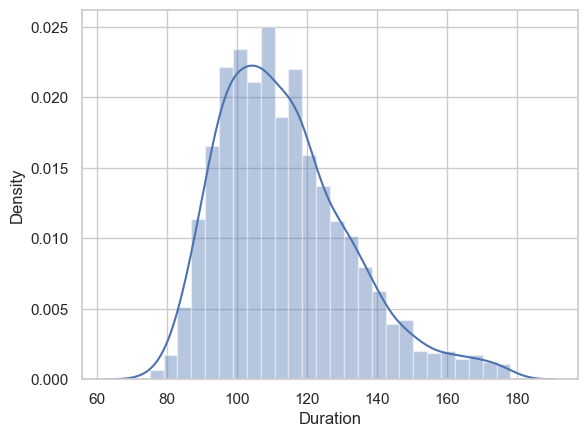

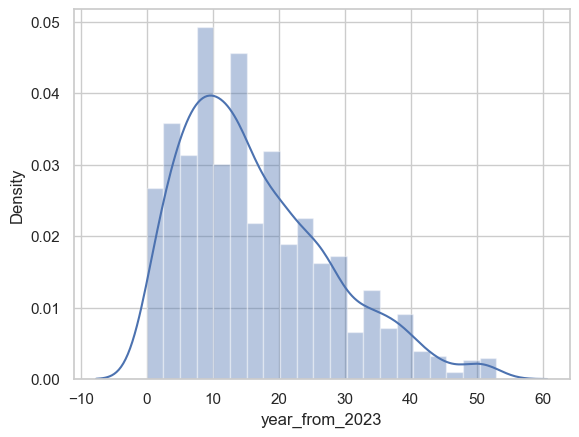

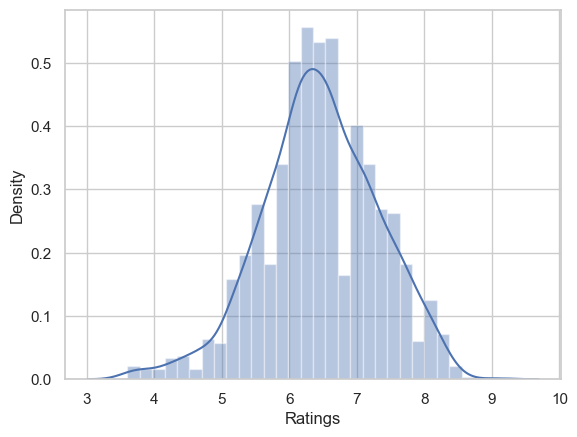

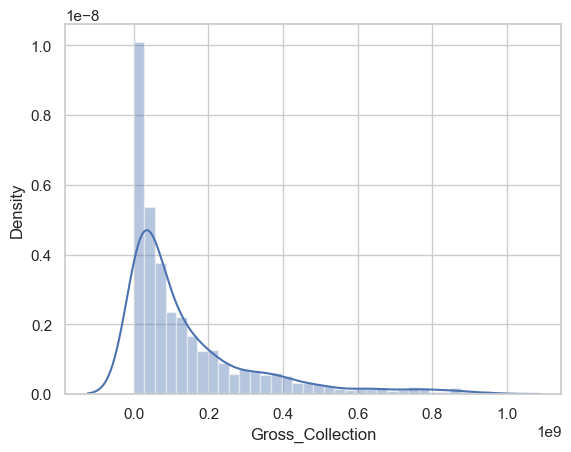

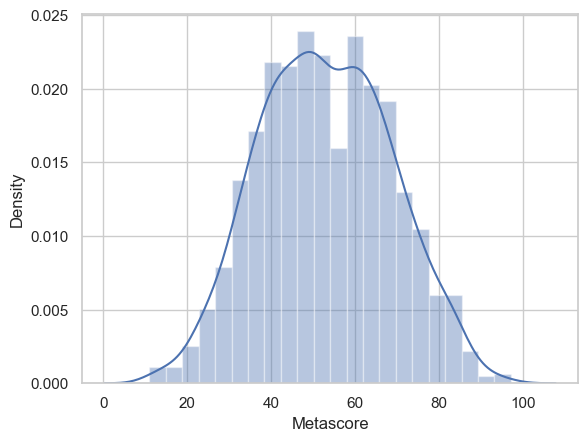

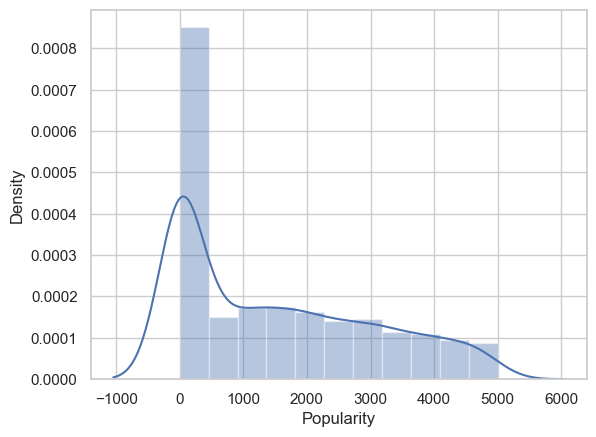

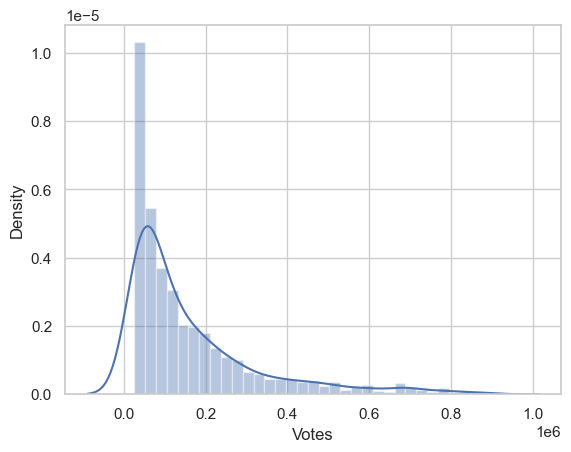

In [76]:
for i in ['Duration', 'year_from_2023', 'Ratings','Gross_Collection','Metascore', 'Popularity','Votes']:
    sns.distplot(Gross_new[i])
    plt.show()

In [79]:
skew_cols=['Votes','year_from_2023','Gross_Collection','Duration']
scaler = PowerTransformer()
Gross_new[skew_cols] = scaler.fit_transform(Gross_new[skew_cols].values)

In [80]:
Gross_new.drop(columns=['Movie_Name'],axis=1,inplace=True)

### Encoding the Categorical Data

In [81]:
Gross_new = pd.get_dummies(Gross_new,columns=['Genre1','Genre2','Genre3','Certification'],drop_first=True)
for i in ['Director1','Star1', 'year_from_2023','Star2','Star3','Star4','Director2','Director3']:
    frequency = Gross_new[i].value_counts(normalize=True)
    # Create a new column with the frequency encoding
    Gross_new[i] = Gross_new[i].map(frequency)

# Display the DataFrame with the frequency encoded columns
Gross_new

Director1  Director2  Director3  Duration  Ratings  Metascore     Star1     Star2     Star3  \
0      0.000618   0.000618   0.000618  1.351451      9.1       86.0  0.001237  0.001237  0.000618   
13     0.000618   0.942486   0.993816  2.072259      8.6       83.2  0.000618  0.000618  0.000618   
16     0.000618   0.000618   0.000618  0.349258      8.4       87.0  0.001237  0.000618  0.001237   
20     0.001855   0.942486   0.993816 -0.614854      8.4       77.0  0.001237  0.001237  0.001237   
21     0.001855   0.942486   0.993816 -0.614854      8.4       77.0  0.002474  0.003092  0.004947   
...         ...        ...        ...       ...      ...        ...       ...       ...       ...   
1813   0.006803   0.942486   0.993816 -1.220149      3.7       38.0  0.000618  0.000618  0.000618   
1814   0.000618   0.942486   0.993816 -1.474607      3.7       24.0  0.001855  0.003092  0.001855   
1815   0.000618   0.942486   0.993816 -0.219796      3.6       14.0  0.000618  0.001855  0.000618   
1816   0.000618   0.942486   0.993816 -1.059357      3.6       11.0  0.000618  0.000618  0.001237   
1817   0.000618   0.942486   0.993816 -0.757088      3.6       28.0  0.000618  0.000618  0.000618   

         Star4     Votes  Gross_Collection  Popularity  year_from_2023  Genre1_Animation  \
0     0.000618 -1.508480         -0.041416        23.0        0.011132                 1   
13    0.000618 -0.578792         -1.567181         0.0        0.028448                 0   
16    0.001237  1.686663          1.316130        86.0        0.036487                 1   
20    0.001237  1.725424         -0.856715       314.0        0.029066                 0   
21    0.001237 -0.259988         -1.294030      1320.0        0.029066                 0   
...        ...       ...               ...         ...             ...               ...   
1813  0.000618 -1.095442         -0.014885      2735.0        0.024737                 0   
1814  0.001237 -0.789339         -0.849111      4702.0        0.009276                 0   
1815  0.000618 -1.266559         -0.462732       902.0        0.021645                 0   
1816  0.000618 -0.653968         -0.225814      3314.0        0.025974                 0   
1817  0.000618 -1.332724         -1.247637         0.0        0.035250                 0   

      Genre2_Biography  Genre2_Comedy  Genre2_Crime  Genre2_Drama  Genre2_Family  Genre2_Fantasy  \
0                    0              0             0             0              0               0   
13                   0              0             0             0              0               0   
16                   0              0             0             0              0               0   
20                   0              0             0             0              0               0   
21                   0              0             0             0              0               0   
...                ...            ...           ...           ...            ...             ...   
1813                 0              1             0             0              0               0   
1814                 0              0             0             0              0               0   
1815                 0              0             0             0              0               1   
1816                 0              0             0             0              0               1   
1817                 0              0             0             0              0               0   

      Genre2_History  Genre2_Horror  Genre2_Music  Genre2_Mystery  Genre2_NA  Genre2_Romance  \
0                  0              0             0               0          0               0   
13                 0              0             0               1          0               0   
16                 0              0             0               0          0               0   
20                 0              0             0               1          0               0   
21     

### Importing Libraries

In [93]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score

### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [191]:
X = df_new.drop('Votes',axis=1)
y = df_new['Votes']

### Feature Scaling

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

Director1  Director2  Director3  Duration   Ratings  Metascore    Star1     Star2     Star3  \
0  -0.817322  -4.005273 -12.464495  1.323547  3.037234   2.106394 -0.70776 -0.175696 -0.657631   
1  -0.817322   0.249768   0.080228  1.749810  2.578149   2.208761 -0.85457 -0.175696 -0.657631   
2  -0.817322   0.249768   0.080228  2.031218  2.463378   1.927251 -0.85457 -0.175696  0.157301   
3  -0.817322  -4.005273 -12.464495  0.336176  2.233835   2.170374 -0.70776 -0.739499  0.157301   
4  -0.213199   0.249768   0.080228 -0.616916  2.233835   1.530578 -0.70776 -0.175696  0.157301   

      Star4  Gross_Collection  Popularity  year_from_2023  Genre1_Animation  Genre2_Biography  \
0 -0.614086         -0.004366   -0.978746       -2.315402          4.855042         -0.076472   
1 -0.614086         -1.648812   -0.993768       -1.393765         -0.205971         -0.076472   
2 -0.614086         -1.566356   -0.993768       -1.910630         -0.205971         -0.076472   
3  0.507175          1.362563   -0.937597       -1.027387          4.855042         -0.076472   
4  0.507175         -0.834498   -0.788679        0.500162         -0.205971         -0.076472   

   Genre2_Comedy  Genre2_Crime  Genre2_Drama  Genre2_Family  Genre2_Fantasy  Genre2_History  \
0      -0.299979     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307   
1      -0.299979     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307   
2      -0.299979     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307   
3      -0.299979     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307   
4      -0.299979     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307   

   Genre2_Horror  Genre2_Music  Genre2_Mystery  Genre2_NA  Genre2_Romance  Genre2_Sci-Fi  \
0      -0.186809     -0.024119       -0.152317  -0.291845       -0.130957      -0.377964   
1      -0.186809     -0.024119       -0.152317   3.426476       -0.130957      -0.377964   
2      -0.186809     -0.024119        6.565254  -0.291845       -0.130957      -0.377964   
3      -0.186809     -0.024119       -0.152317  -0.291845       -0.130957      -0.377964   
4      -0.186809     -0.024119        6.565254  -0.291845       -0.130957      -0.377964   

   Genre2_Sport  Genre2_Thriller  Genre2_War  Genre2_Western  Genre3_Biography  Genre3_Comedy  \
0       -0.0969        -0.465196   -0.116419       -0.059166         -0.076472      -0.299979   
1       -0.0969        -0.465196   -0.116419       -0.059166         -0.076472      -0.299979   
2       -0.0969        -0.465196   -0.116419       -0.059166         -0.076472      -0.299979   
3       -0.0969        -0.465196   -0.116419       -0.059166         -0.076472      -0.299979   
4       -0.0969        -0.465196   -0.116419       -0.059166         -0.076472      -0.299979   

   Genre3_Crime  Genre3_Drama  Genre3_Family  Genre3_Fantasy  Genre3_History  Genre3_Horror  \
0     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307      -0.186809   
1     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307      -0.186809   
2     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307      -0.186809   
3     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307      -0.186809   
4     -0.336554     -0.484505      -0.118958       -0.268922       -0.150307      -0.186809   

   Genre3_Music  Genre3_Mystery  Genre3_NA  Genre3_Romance  Genre3_Sci-Fi  Genre3_Sport  \
0     -0.024119       -0.152317  -0.291845       -0.130957      -0.377964       -0.0969   
1     -0.024119       -0.152317   3.426476       -0.130957      -0.377964       -0.0969   
2     -0.024119        6.565254  -0.291845       -0.130957      -0.377964       -0.0969   
3     -0.024119       -0.152317  -0.291845       -0.130957      -0.377964       -0.0969   
4     -0.024119        6.565254  -0.291845       -0.130957      -0.377964       -0.0969   

   Gen

In [193]:
X.shape

(1720, 61)

### Feature Selection

In [194]:
from sklearn.feature_selection import RFE,SelectKBest,f_classif

In [195]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(X, y )

import itertools
f_reg_results = [(i, j, k) for i, j, k in itertools.zip_longest(X.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by = ['P_Value']).head(25)
f_reg_results

Variable      F_Value P_Value
0                 Director1   191.792672   0.000
19           Genre2_Fantasy    17.013500   0.000
34             Genre3_Drama    33.014778   0.000
17             Genre2_Drama    33.014778   0.000
36           Genre3_Fantasy    17.013500   0.000
43            Genre3_Sci-Fi    85.743093   0.000
52  Certification_Not Rated   125.487462   0.000
26            Genre2_Sci-Fi    85.743093   0.000
10         Gross_Collection  1858.157353   0.000
11               Popularity    28.370197   0.000
8                     Star3    88.838210   0.000
7                     Star2    72.899824   0.000
6                     Star1    59.699303   0.000
5                 Metascore    82.579359   0.000
4                   Ratings   201.225639   0.000
3                  Duration    91.240594   0.000
54      Certification_PG-13   172.014915   0.000
57      Certification_TV-MA    24.197706   0.000
9                     Star4    91.433083   0.000
51          Certification_G    11.192305   0.001
42           Genre3_Romance    11.132082   0.001
33             Genre3_Crime    11.470857   0.001
25           Genre2_Romance    11.132082   0.001
60         Certification_UA    11.253318   0.001
16             Genre2_Crime    11.470857   0.001

In [196]:
List_F_reg=f_reg_results['Variable'][:-1].values  # CI=0.90
List_F_reg

array(['Director1', 'Genre2_Fantasy', 'Genre3_Drama', 'Genre2_Drama',
       'Genre3_Fantasy', 'Genre3_Sci-Fi', 'Certification_Not Rated',
       'Genre2_Sci-Fi', 'Gross_Collection', 'Popularity', 'Star3',
       'Star2', 'Star1', 'Metascore', 'Ratings', 'Duration',
       'Certification_PG-13', 'Certification_TV-MA', 'Star4',
       'Certification_G', 'Genre3_Romance', 'Genre3_Crime',
       'Genre2_Romance', 'Certification_UA'], dtype=object)

#### Random Forest Regressor

In [197]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=17).fit(X,y)
List_rfe = X.columns[rfe.get_support()]
List_rfe

Index(['Director1', 'Duration', 'Ratings', 'Metascore', 'Star1', 'Star2', 'Star3', 'Star4',
       'Gross_Collection', 'Popularity', 'year_from_2023', 'Genre1_Animation', 'Genre3_Thriller',
       'Certification_Not Rated', 'Certification_PG', 'Certification_PG-13', 'Certification_R'],
      dtype='object')

#### SelectK Best

In [198]:
SKB = SelectKBest(f_classif, k=17).fit(X,y)
List_K_Best = X.columns[SKB.get_support()]
List_K_Best

Index(['Genre3_Crime', 'Genre3_Family', 'Genre3_History', 'Genre3_Music', 'Genre3_Mystery',
       'Genre3_Romance', 'Genre3_Sport', 'Genre3_War', 'Genre3_Western', 'Certification_16',
       'Certification_A', 'Certification_Approved', 'Certification_G', 'Certification_TV-14',
       'Certification_TV-PG', 'Certification_U', 'Certification_UA'],
      dtype='object')

In [199]:
Top_Features = list(set(list(List_F_reg)+list(List_rfe)+list(List_K_Best)))

### Variance Inflation Factor for Multicollinearity

In [200]:
X = X[Top_Features]

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty DataFrame for VIF
vif = pd.DataFrame()

# Calculate VIF for each feature
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Assign feature names to the DataFrame
vif["features"] = X.columns

# Sort the DataFrame by VIF_Factor in descending order
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)

In [202]:
vif

VIF_Factor                 features
2            inf             Genre2_Drama
18           inf             Genre3_Drama
5   6.616020e+07           Genre2_Fantasy
25  5.321432e+07           Genre3_Fantasy
29  6.384198e+06           Genre3_Romance
16  4.964556e+06            Genre2_Sci-Fi
40  9.878161e+05           Genre2_Romance
37  2.980976e+05            Genre3_Sci-Fi
11  1.447358e+02          Certification_R
6   1.385735e+02      Certification_PG-13
12  5.689783e+01         Certification_PG
38  3.858637e+01  Certification_Not Rated
1   1.343538e+01      Certification_TV-MA
0   5.818825e+00         Certification_UA
24  4.088640e+00          Certification_G
14  3.753554e+00      Certification_TV-14
21  2.755785e+00                  Ratings
19  2.507793e+00                Metascore
7   2.030891e+00   Certification_Approved
33  1.894076e+00         Gross_Collection
32  1.668920e+00                 Duration
10  1.656600e+00          Genre3_Thriller
39  1.499143e+00          Certification_U
34  1.462737e+00         Genre1_Animation
15  1.384685e+00             Genre3_Crime
28  1.367012e+00      Certification_TV-PG
4   1.359454e+00         Certification_16
17  1.349119e+00          Certification_A
3   1.299332e+00           year_from_2023
13  1.222290e+00                Director1
8   1.191101e+00                    Star1
31  1.190205e+00            Genre3_Family
20  1.147344e+00                    Star4
26  1.140612e+00           Genre3_History
36  1.137174e+00                    Star2
41  1.133131e+00                    Star3
23  1.109339e+00               Genre3_War
27  1.084300e+00             Genre3_Sport
30  1.070212e+00               Popularity
22  1.069230e+00           Genre3_Mystery
9   1.026621e+00           Genre3_Western
35  1.011577e+00             Genre3_Music

In [203]:
X.drop('Genre2_Drama',axis=1,inplace=True)

### Model Building

#### Finding the Best Random State

In [204]:
max_acc=0
max_RS=0
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

    lr= LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.7234609256722979 seen for random state: 31


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

def Regression_Model(model, X, y):
    # Selecting the best random state to get maximum accuracy
    max_acc = 0
    max_RS = 0
    for i in range(1, 100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = r2_score(y_test, pred)
        if acc > max_acc:
            max_acc = acc
            max_RS = i

    print("The max accuracy is", max_acc, 'seen for random state:', max_RS)

    # Splitting the dataset using the best random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=max_RS)

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on train and test data
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Evaluation metrics
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    mae = mean_absolute_error(y_test, pred_test)
    mse = mean_squared_error(y_test, pred_test)

    print('The r2 score_train is:', r2_train)
    print('The r2 score_test is:', r2_test)
    print('The mean absolute error:', mae)
    print('The mean squared error:', mse)

    # Cross Validation Score
    cv = cross_val_score(model, X, y, cv=10)
    print('The cross validation score:', cv.mean())

    # Plotting the predicted vs actual values
    sns.regplot(x=y_test, y=pred_test)
    plt.title("Model - Regression")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()


### KNN

R2 Score (Train):  0.6835976379170274
R2 Score (Test):  0.5662614071026748
Root Mean Squared Error (RMSE):  0.6822
Mean Absolute Error (MAE):  0.536087093294564
Mean Cross-Validation Score:  0.2758895778622312


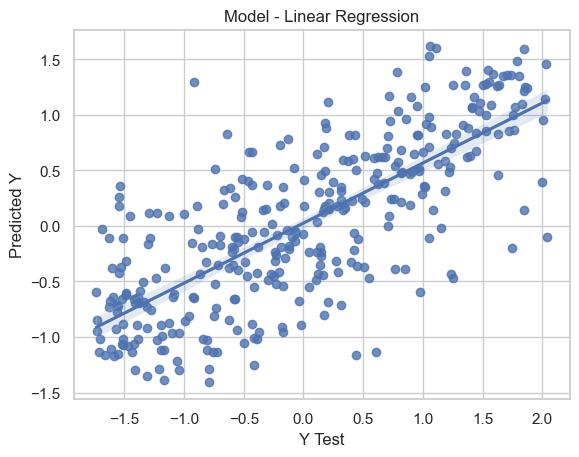

In [207]:
Regression_model(KNeighborsRegressor,X,y)

### SVR

R2 Score (Train):  0.8024571263594985
R2 Score (Test):  0.7456502884750793
Root Mean Squared Error (RMSE):  0.5224
Mean Absolute Error (MAE):  0.3978673142272912
Mean Cross-Validation Score:  0.6244972685327088


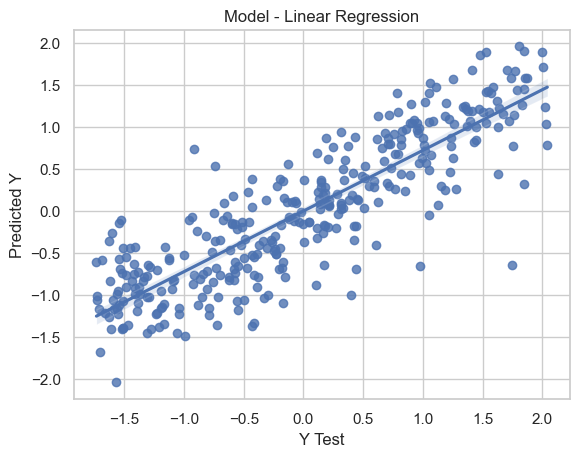

In [208]:
Regression_model(SVR,X,y)

### Decision Tree Regressor

R2 Score (Train):  1.0
R2 Score (Test):  0.6422417882686683
Root Mean Squared Error (RMSE):  0.6196
Mean Absolute Error (MAE):  0.4746240421855394
Mean Cross-Validation Score:  0.39607852178277136


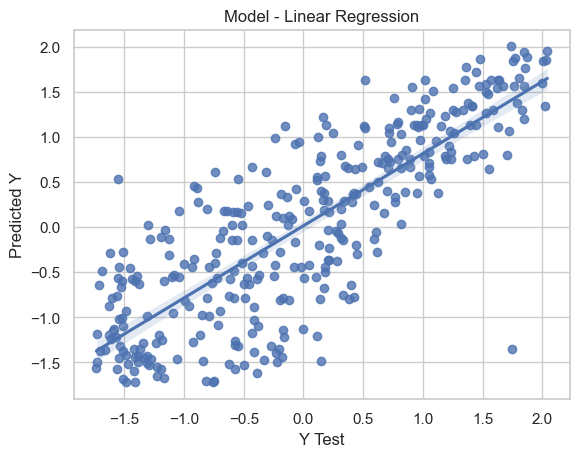

In [209]:
Regression_model(DecisionTreeRegressor,X,y)

### Random Forest Regressor

R2 Score (Train):  0.9693266665860394
R2 Score (Test):  0.8070142266236322
Root Mean Squared Error (RMSE):  0.4551
Mean Absolute Error (MAE):  0.3553174838709997
Mean Cross-Validation Score:  0.6970234166434424


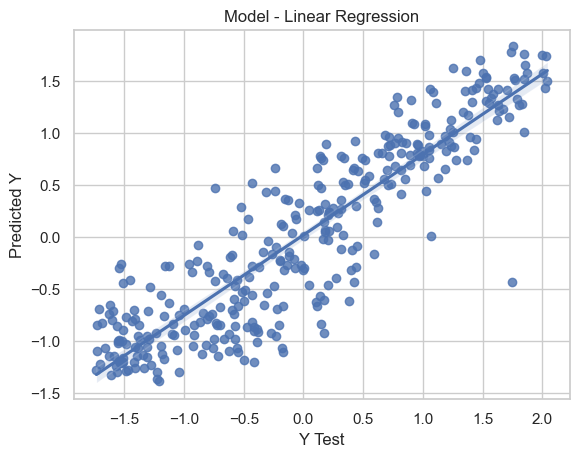

In [210]:
Regression_model(RandomForestRegressor,X,y)

### Gradient Boost

R2 Score (Train):  0.8774944823404754
R2 Score (Test):  0.8269139037208725
Root Mean Squared Error (RMSE):  0.431
Mean Absolute Error (MAE):  0.3329965734602433
Mean Cross-Validation Score:  0.7248446845518443


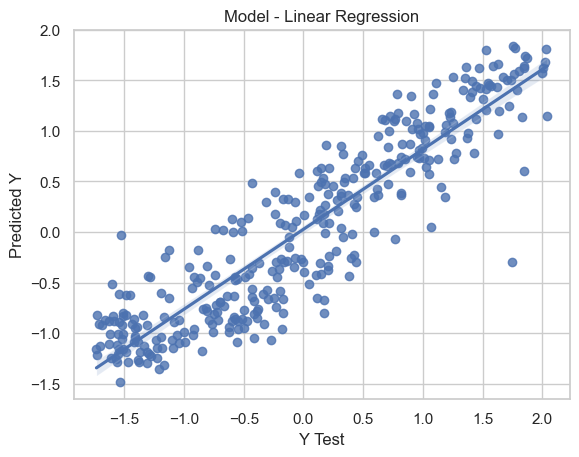

In [211]:
Regression_model(GradientBoostingRegressor,X,y)

### Ada Boost

R2 Score (Train):  0.765647897079718
R2 Score (Test):  0.7580371657292826
Root Mean Squared Error (RMSE):  0.5096
Mean Absolute Error (MAE):  0.4160276571105429
Mean Cross-Validation Score:  0.6340851803329939


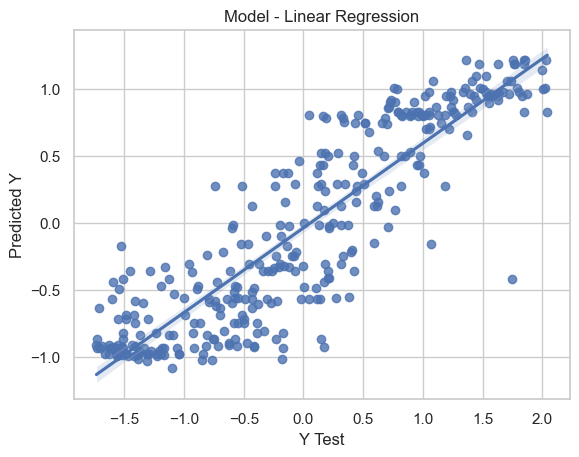

In [212]:
Regression_model(AdaBoostRegressor,X,y)

### XGBoost

R2 Score (Train):  0.9962191620521416
R2 Score (Test):  0.8112884430216808
Root Mean Squared Error (RMSE):  0.45
Mean Absolute Error (MAE):  0.3441583060982875
Mean Cross-Validation Score:  0.7022312601763078


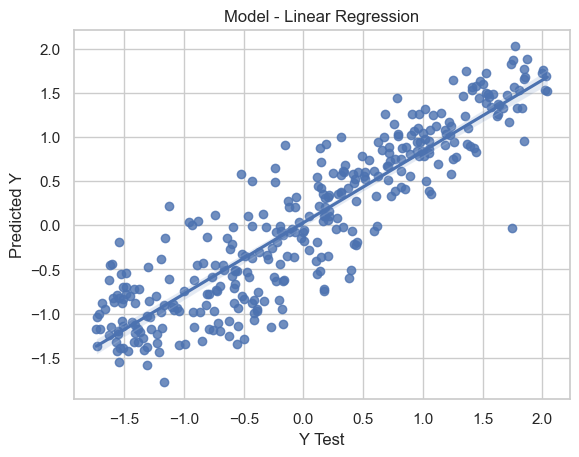

In [213]:
Regression_model(XGBRegressor,X,y)

#### The Best Performing Model is XGBoost Regressor 

In [214]:
# Tunning Hyperparameters for XGB Regressor

# Define the parameter grid
params = {
    'n_estimators': [100, 200,500,700,1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3,5,7,9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8,1],
    'min_child_weight': [1,5,10]
}
Final_Model = GridSearchCV(XGBRegressor(),params,scoring='r2',cv=5,n_jobs=-1,verbose=True)
Final_Model.fit(X_train,y_train)
y_pred = Final_Model.predict(X_test)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", Final_Model.best_estimator_)
print("\n The best score across ALL searched params:\n", Final_Model.best_score_)
print("\n The best parameters across ALL searched params:\n",Final_Model.best_params_)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
The r2 score is: 0.8456343109400687

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

 The best score across ALL searched params:
 0.8083799944566555

 The best parameters across ALL searched params:

In [218]:
final_model = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.01, max_depth= 5, min_child_weight= 10, n_estimators= 1000, subsample= 0.8)
final_model.fit(X, y)

pred_train=final_model.predict(X_train)
pred_test= final_model.predict(X_test)
print('The r2 score_train is: ', r2_score(y_train, pred_train))
print('The r2 score_test is: ', r2_score(y_test, pred_test))
print('The mean absolute error ', mean_absolute_error(y_test, pred_test))
print('mean_squared_error: ',mean_squared_error(y_test,pred_test))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,pred_test)))

The r2 score_train is:  0.9272228200860828
The r2 score_test is:  0.9361087874404928
The mean absolute error  0.1980358945418639
mean_squared_error:  0.06856000884904997
root_mean_squared_error:  0.2618396624826918


### Saving the Model

In [220]:
import joblib
#Saving the model using .pkl
joblib.dump(Final_Model,'Votes_predictor.pkl')

# load model and get predictions
model=joblib.load('Votes_predictor.pkl')

## Predict
prediction= model.predict(X_test)
pd.DataFrame([model.predict(X_test)[:], y_test[:]], index = ['Predicted', 'Original'])

0         1         2         3         4         5         6         7    \
Predicted  1.225558  1.189306  0.855419  0.375625 -0.643857 -1.097127  0.720816 -0.668282   
Original   1.394199  1.194238  0.788697  0.624420  0.172966 -1.516975  1.180859 -0.662163   

                8         9         10        11        12        13        14        15   \
Predicted  1.420151 -0.755104 -1.085062  1.533561  0.681722 -0.024242  0.355124 -0.724695   
Original   1.667319 -0.572482 -1.298373  1.465944  0.673119 -0.595819  0.310994 -0.501030   

                16        17        18        19        20        21        22        23   \
Predicted -0.628174 -0.395304 -0.824259 -0.743819  1.466282 -0.937131  1.114983 -0.625874   
Original  -0.174841 -0.455063 -1.408344 -0.723154  1.831030 -0.697200  0.903557 -0.583009   

                24        25        26        27        28        29        30        31   \
Predicted -0.274108 -0.784228  0.192508  1.408019 -0.245201 -0.240956 -0.241435  0.845601   
Original  -0.069898 -1.514204 -0.068128  0.783108  1.748520  0.439424 -0.806589  0.967675   

                32        33        34        35        36        37       38        39   \
Predicted  0.803791 -0.886573 -1.184242  0.133239  1.043760  0.742319 -1.10790 -0.925135   
Original   1.263249 -0.803478 -1.099252  0.176308  1.048033  1.009525 -1.08491 -1.453363   

                40        41        42        43        44        45        46        47   \
Predicted -1.191070  0.379944 -0.684321  0.172380 -0.435597 -1.198272 -0.277766  1.699043   
Original  -1.732626  0.766631 -0.572873  0.214737 -0.914264 -1.701673  0.148735  1.992797   

                48        49        50        51        52        53        54        55   \
Predicted -0.636601 -0.923319 -0.816017 -0.908779  1.155108 -0.653003 -1.150318  0.910579   
Original  -0.840548 -1.002656 -0.417599 -0.390945  0.907674 -1.192381 -1.386527  0.992602   

                56        57        58        59        60        61        62        63   \
Predicted  1.670236  0.113526  0.598254 -0.907765  0.928616  0.041477 -0.710340 -1.114198   
Original   2.000629 -0.173408  1.028075 -1.662518  1.151781  0.113381 -0.429461 -1.187643   

                64        65        66        67        68        69        70        71   \
Predicted -0.619495 -0.139072  1.558340  1.744689  0.034323  1.425910 -1.291945  0.255878   
Original  -1.280965  0.203911  1.248196  1.855506  0.282234  1.700797 -1.540045  0.204673   

               72        73        74        75        76        77        78        79   \
Predicted -0.53973  1.464794 -0.995343 -0.962221 -0.072522 -0.347528  0.633722  0.315136   
Original  -0.29842  1.541908 -1.406549 -0.625777  0.405900  0.043273  0.342659 -0.239728   

                80        81        82        83        84        85        86        87   \
Predicted  0.385216  0.820783  0.154726  0.264244  0.763827  1.390455  0.601287 -1.049956   
Original   0.609042  0.184994  0.132228 -0.519570  1.051145  1.525198  0.141938 -1.307260   

                88        89        90        91        92        93        94        95   \
Predicted -1.329236 -0.358528  0.618010  1.567270 -1.418450 -0.221280  1.858325  1.124886   
Original  -1.221659 -1.161778  0.124422  1.629645 -1.556872 -0.232777  1.754701  0.788697   

                96        97        98        99        100       101       102       103  \
Predicted -0.884863 -1.069562  1.601666 -0.935217  0.602522  0.604130  0.880065 -0.284752   
Original  -0.817836 -0.416291  2.023957 -1.340579  0.731706  0.695695  0.621934 -1.526699   

                104       105       106       107       108       109       110       111  \
Predicted -0.187474  1.189725 -1.278159 -0.695463  0.811440  0.043318 -0.441946  1.648838   
Original  -1.126393  1.216686 -1.168846  0.170139  0.824313 -0.515449 -0.569206  1.758232   

                112       113       114       115       116       117       118       119  \
Predicted

## Regression Problem (Gross_Collection)

In [221]:
X = Gross_new.drop('Gross_Collection',axis=1)
y = Gross_new['Gross_Collection']

#### Feature Scaling

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

Director1  Director2  Director3  Duration   Ratings  Metascore     Star1     Star2     Star3  \
0  -0.839626  -4.049796 -12.676750  1.351451  3.076689   2.129087 -0.717262 -0.178266 -0.657034   
1  -0.839626   0.247030   0.078885  2.072259  2.495863   1.949036 -0.864464 -0.742369 -0.657034   
2  -0.839626  -4.049796 -12.676750  0.349258  2.263533   2.193390 -0.717262 -0.742369  0.141781   
3  -0.216553   0.247030   0.078885 -0.614854  2.263533   1.550353 -0.717262 -0.178266  0.141781   
4  -0.216553   0.247030   0.078885 -0.614854  2.263533   1.550353 -0.422856  1.514043  4.934674   

      Star4     Votes  Popularity  year_from_2023  Genre1_Animation  Genre2_Biography  \
0 -0.618137 -1.508480   -0.981330       -1.516925          4.772778         -0.074813   
1 -0.618137 -0.578792   -0.996371       -0.033069         -0.209522         -0.074813   
2  0.489986  1.686663   -0.940131        0.655865          4.772778         -0.074813   
3  0.489986  1.725424   -0.791031        0.019926         -0.209522         -0.074813   
4  0.489986 -0.259988   -0.133158        0.019926         -0.209522         -0.074813   

   Genre2_Comedy  Genre2_Crime  Genre2_Drama  Genre2_Family  Genre2_Fantasy  Genre2_History  \
0      -0.298142     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089   
1      -0.298142     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089   
2      -0.298142     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089   
3      -0.298142     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089   
4      -0.298142     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089   

   Genre2_Horror  Genre2_Music  Genre2_Mystery  Genre2_NA  Genre2_Romance  Genre2_Sci-Fi  \
0      -0.187647     -0.024876       -0.153028  -0.289448       -0.127836      -0.385276   
1      -0.187647     -0.024876        6.534730  -0.289448       -0.127836      -0.385276   
2      -0.187647     -0.024876       -0.153028  -0.289448       -0.127836      -0.385276   
3      -0.187647     -0.024876        6.534730  -0.289448       -0.127836      -0.385276   
4      -0.187647     -0.024876        6.534730  -0.289448       -0.127836      -0.385276   

   Genre2_Sport  Genre2_Thriller  Genre2_War  Genre2_Western  Genre3_Biography  Genre3_Comedy  \
0     -0.093454        -0.467481   -0.103078       -0.061028         -0.074813      -0.298142   
1     -0.093454        -0.467481   -0.103078       -0.061028         -0.074813      -0.298142   
2     -0.093454        -0.467481   -0.103078       -0.061028         -0.074813      -0.298142   
3     -0.093454        -0.467481   -0.103078       -0.061028         -0.074813      -0.298142   
4     -0.093454        -0.467481   -0.103078       -0.061028         -0.074813      -0.298142   

   Genre3_Crime  Genre3_Drama  Genre3_Family  Genre3_Fantasy  Genre3_History  Genre3_Horror  \
0     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089      -0.187647   
1     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089      -0.187647   
2     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089      -0.187647   
3     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089      -0.187647   
4     -0.331383     -0.484098      -0.122743       -0.276703       -0.142089      -0.187647   

   Genre3_Music  Genre3_Mystery  Genre3_NA  Genre3_Romance  Genre3_Sci-Fi  Genre3_Sport  \
0     -0.024876       -0.153028  -0.289448       -0.127836      -0.385276     -0.093454   
1     -0.024876        6.534730  -0.289448       -0.127836      -0.385276     -0.093454   
2     -0.024876       -0.153028  -0.289448       -0.127836      -0.385276     -0.093454   
3     -0.024876        6.534730  -0.289448       -0.127836      -0.385276     -0.093454   
4     -0.024876        6.534730  -0.289448       -0.127836      -0.385276     -0.093454   

   Genre3_Thriller  Genre3_War  Genre3_Western  

#### Feature Selection

In [223]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(X, y )

import itertools
f_reg_results = [(i, j, k) for i, j, k in itertools.zip_longest(X.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by = ['P_Value']).head(25)
f_reg_results

Variable      F_Value P_Value
0                 Director1   161.442659   0.000
56      Certification_TV-MA    35.224761   0.000
54          Certification_R   134.471477   0.000
53      Certification_PG-13   362.791823   0.000
52         Certification_PG    16.906048   0.000
51  Certification_Not Rated   127.594708   0.000
43            Genre3_Sci-Fi    56.956278   0.000
36           Genre3_Fantasy    22.442037   0.000
34             Genre3_Drama    60.385283   0.000
32            Genre3_Comedy    12.639378   0.000
26            Genre2_Sci-Fi    56.956278   0.000
19           Genre2_Fantasy    22.442037   0.000
17             Genre2_Drama    60.385283   0.000
15            Genre2_Comedy    12.639378   0.000
59         Certification_UA    23.090150   0.000
10                    Votes  1775.485487   0.000
12           year_from_2023    12.914840   0.000
8                     Star3    61.424194   0.000
9                     Star4    81.647181   0.000
6                     Star1    61.055330   0.000
7                     Star2    83.265199   0.000
3                  Duration    93.929749   0.000
58          Certification_U    10.472259   0.001
16             Genre2_Crime     9.188226   0.002
11               Popularity     9.991011   0.002

In [224]:
List_F_reg=f_reg_results['Variable'][:-6].values  # CI=0.90
List_F_reg

array(['Director1', 'Certification_TV-MA', 'Certification_R',
       'Certification_PG-13', 'Certification_PG',
       'Certification_Not Rated', 'Genre3_Sci-Fi', 'Genre3_Fantasy',
       'Genre3_Drama', 'Genre3_Comedy', 'Genre2_Sci-Fi', 'Genre2_Fantasy',
       'Genre2_Drama', 'Genre2_Comedy', 'Certification_UA', 'Votes',
       'year_from_2023', 'Star3', 'Star4'], dtype=object)

In [226]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=7).fit(X,y)
List_rfe = X.columns[rfe.get_support()]
List_rfe

Index(['Duration', 'Ratings', 'Metascore', 'Votes', 'Popularity', 'year_from_2023',
       'Certification_R'],
      dtype='object')

In [227]:
SKB = SelectKBest(f_classif, k=7).fit(X,y)
List_K_Best = X.columns[SKB.get_support()]
List_K_Best

Index(['Certification_PG-13', 'Certification_R', 'Certification_TV-14', 'Certification_TV-MA',
       'Certification_TV-PG', 'Certification_U', 'Certification_UA'],
      dtype='object')

In [228]:
final_list = list(set(list(List_F_reg)+list(List_rfe)+list(List_K_Best)))

In [229]:
final_list

['Certification_UA',
 'Certification_TV-MA',
 'Genre2_Drama',
 'year_from_2023',
 'Certification_PG-13',
 'Genre2_Fantasy',
 'Votes',
 'Certification_R',
 'Certification_PG',
 'Director1',
 'Certification_TV-14',
 'Genre2_Sci-Fi',
 'Genre3_Drama',
 'Metascore',
 'Star4',
 'Ratings',
 'Genre3_Fantasy',
 'Certification_TV-PG',
 'Popularity',
 'Duration',
 'Genre3_Sci-Fi',
 'Certification_Not Rated',
 'Certification_U',
 'Genre2_Comedy',
 'Star3',
 'Genre3_Comedy']

In [230]:
X = X[final_list]

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty DataFrame for VIF
vif = pd.DataFrame()

# Calculate VIF for each feature
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Assign feature names to the DataFrame
vif["features"] = X.columns

# Sort the DataFrame by VIF_Factor in descending order
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)

In [232]:
vif

VIF_Factor                 features
2            inf             Genre2_Drama
12           inf             Genre3_Drama
23  3.698797e+07            Genre2_Comedy
16  9.528277e+06           Genre3_Fantasy
11  9.465159e+06            Genre2_Sci-Fi
20  2.815189e+06            Genre3_Sci-Fi
5   2.265778e+05           Genre2_Fantasy
25  1.284699e+05            Genre3_Comedy
7   4.078283e+01          Certification_R
4   3.962571e+01      Certification_PG-13
8   1.659861e+01         Certification_PG
21  1.115732e+01  Certification_Not Rated
15  2.985617e+00                  Ratings
1   2.613731e+00      Certification_TV-MA
13  2.468920e+00                Metascore
0   2.237699e+00         Certification_UA
6   2.003526e+00                    Votes
19  1.419433e+00                 Duration
22  1.311014e+00          Certification_U
10  1.211280e+00      Certification_TV-14
9   1.199016e+00                Director1
3   1.153114e+00           year_from_2023
24  1.120716e+00                    Star3
14  1.115025e+00                    Star4
17  1.107240e+00      Certification_TV-PG
18  1.070103e+00               Popularity

In [233]:
X.drop('Genre2_Drama',axis=1,inplace=True)

### Model Building

In [237]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

    lr= LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.754435096455994 seen for random state: 7


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=max_RS)

#### Linear Regression

R2_Score_train:  0.6382797528089628
R2_Score_test:  0.754435096455994
RMSE =  0.5301
The mean absolute error =  0.4088589664266651


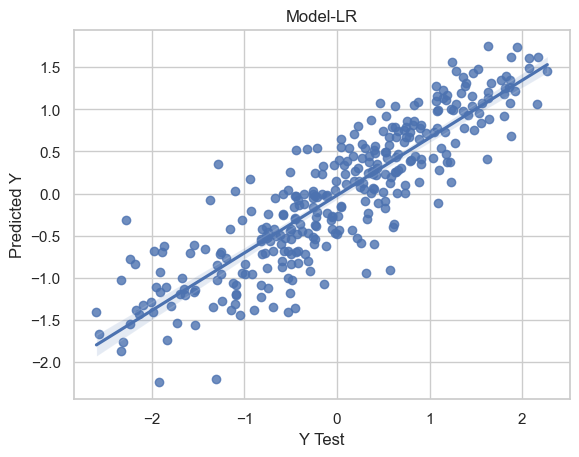

In [239]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error = ', mean_absolute_error(y_test, pred_test))
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### KNN

R2 Score (Train):  0.6934899996422765
R2 Score (Test):  0.5750182153773078
Root Mean Squared Error (RMSE):  0.6662
Mean Absolute Error (MAE):  0.525672251474168
Mean Cross-Validation Score:  0.5063605099949899


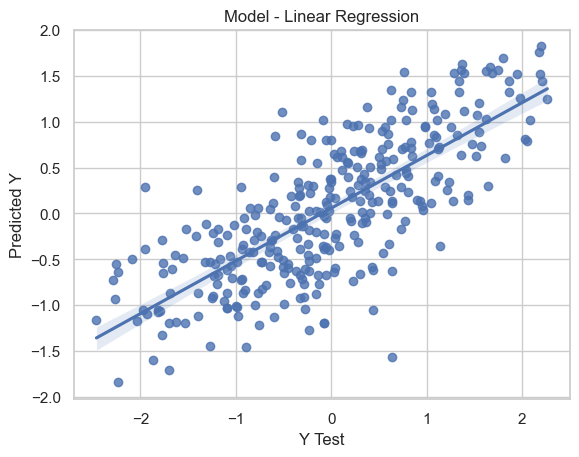

In [240]:
Regression_model(KNeighborsRegressor,X,y)

### SVR

R2 Score (Train):  0.767894879177244
R2 Score (Test):  0.6672081665153701
Root Mean Squared Error (RMSE):  0.5895
Mean Absolute Error (MAE):  0.44096204795100435
Mean Cross-Validation Score:  0.6512500544917327


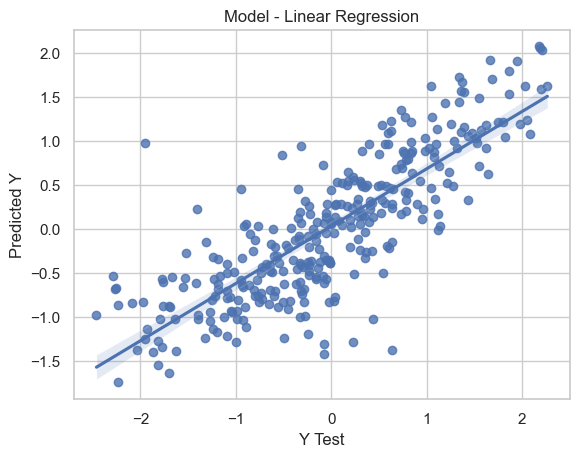

In [241]:
Regression_model(SVR,X,y)

### Decision Tree Regressor

R2 Score (Train):  1.0
R2 Score (Test):  0.3560659024480557
Root Mean Squared Error (RMSE):  0.82
Mean Absolute Error (MAE):  0.6252750479610625
Mean Cross-Validation Score:  0.3116547496955183


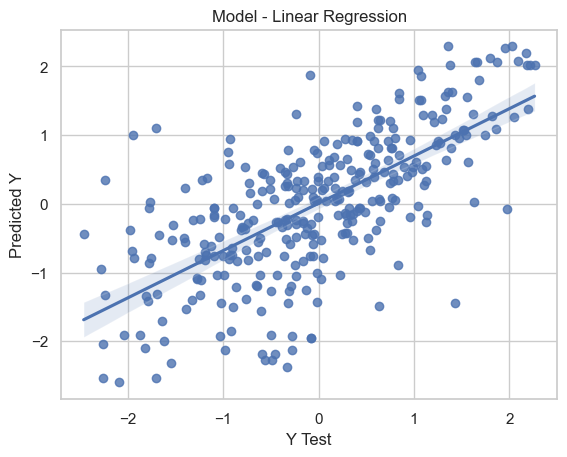

In [242]:
Regression_model(DecisionTreeRegressor,X,y)

### RandomForestRegressor

R2 Score (Train):  0.9503397464470043
R2 Score (Test):  0.6319201576193918
Root Mean Squared Error (RMSE):  0.62
Mean Absolute Error (MAE):  0.4709006262046255
Mean Cross-Validation Score:  0.6051848199761665


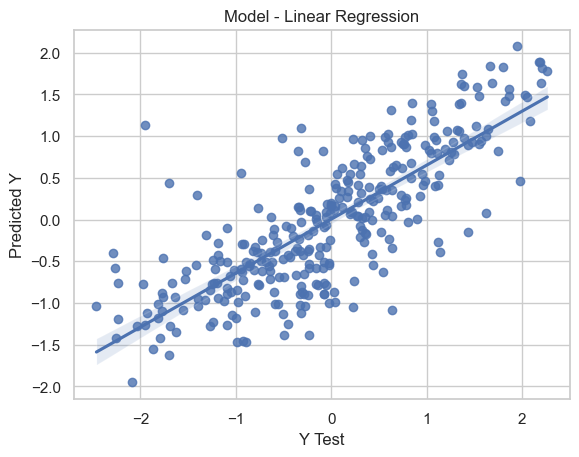

In [243]:
Regression_model(RandomForestRegressor,X,y)

### GB Regressor

R2 Score (Train):  0.7946833726358705
R2 Score (Test):  0.6616256830395808
Root Mean Squared Error (RMSE):  0.5944
Mean Absolute Error (MAE):  0.45376305477070644
Mean Cross-Validation Score:  0.6338692177181777


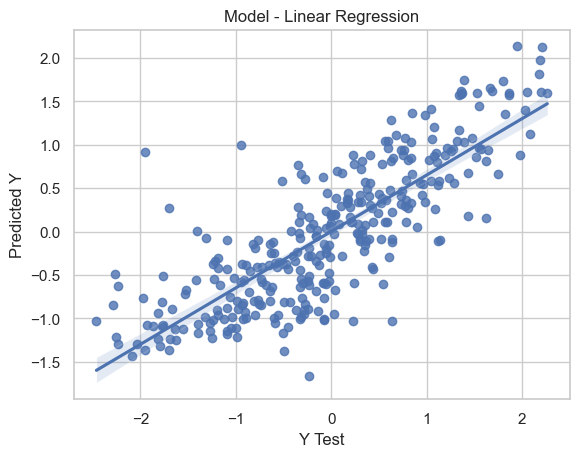

In [244]:
Regression_model(GradientBoostingRegressor,X,y)

### AdaBoost Regressor

R2 Score (Train):  0.641670599150951
R2 Score (Test):  0.533436880963382
Root Mean Squared Error (RMSE):  0.698
Mean Absolute Error (MAE):  0.5513716772239121
Mean Cross-Validation Score:  0.5011954626309085


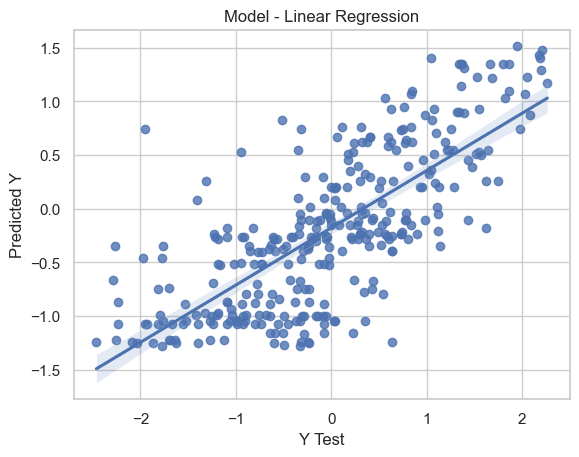

In [245]:
Regression_model(AdaBoostRegressor,X,y)

### XGBoost Regressor

R2 Score (Train):  0.9944565782153869
R2 Score (Test):  0.6466672783607141
Root Mean Squared Error (RMSE):  0.6074
Mean Absolute Error (MAE):  0.46554439303033773
Mean Cross-Validation Score:  0.5734670562721427


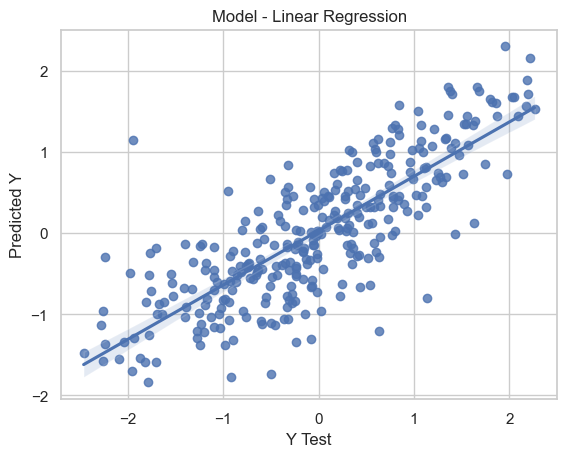

In [246]:
Regression_model(XGBRegressor,X,y)

In [249]:
#Hyperparameter Tuning
# Tunning Hyperparameters for XGB Regressor

params = {
    'n_estimators': [100, 200,500,700],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3,5,7,9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8,1]
}

Final_Model = GridSearchCV(XGBRegressor(),params,scoring='r2',cv =10,n_jobs=-1,verbose=True)
Final_Model.fit(X_train,y_train)
y_pred = Final_Model.predict(X_test)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", Final_Model.best_estimator_)
print("\n The best score across ALL searched params:\n", Final_Model.best_score_)
print("\n The best parameters across ALL searched params:\n",Final_Model.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
The r2 score is: 0.7494192280343563

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

 The best score across ALL searched params:
 0.6482894837561824

 The best parameters across ALL searched param

In [252]:
# Reinstating with tuned parameters
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

Final_Model=XGBRegressor(n_estimators=100,max_depth=3,colsample_bytree=1,learning_rate=0.1,subsample=0.8).fit(X_train,y_train)

pred_train=xgb_model.predict(X_train)
pred_test= xgb_model.predict(X_test)
print('The r2 score_train is: ', r2_score(y_train, pred_train))
print('The r2 score_test is: ', r2_score(y_test, pred_test))
print('The mean absolute error ', mean_absolute_error(y_test, pred_test))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,pred_test)))

The r2 score_train is:  0.7901809596071032
The r2 score_test is:  0.6838756592371762
The mean absolute error  0.4527750285056566
root_mean_squared_error:  0.5918412076915296


### Saving the model

In [253]:
joblib.dump(Final_Model,'Gross_predictor.pkl')

['Gross_predictor.pkl']